In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [2]:
def collect_layer_wise_losses(d):
    losses = {}
    for layer, results in d.items():
        if layer == "linear":
            continue

        losses[layer] = {}
        
        for k, v in results.items():
            if "test" in k:
                losses[layer][k.replace('_score_test', '')] = 100 - v
                
    return losses

def collect_losses(root_dir):

    depth = 2

    dict_res_roberta = dict()
    dict_res_camem = dict()
    dict_res_xlm = dict()
    
    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) < depth:
            for file_ in files:
                if file_ == "probe_results.json":
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)
                    model_type = subdir.split(os.sep)[-1].split("_")[-1]
                    dataset_name = "_".join(subdir.split(os.sep)[-1].split("_")[1:-1])
                    if model_type == "roberta":
                        
                        dict_res_roberta[dataset_name] = collect_layer_wise_losses(d)
                    elif model_type == "xlm":
                        dict_res_xlm[dataset_name] = collect_layer_wise_losses(d)
                    elif model_type == "camem":
                        dict_res_camem[dataset_name] = collect_layer_wise_losses(d)

    return dict_res_roberta, dict_res_camem, dict_res_xlm


def print_probe_results(dict_res):
    for dataset, res in dict_res.items():
        res_d = pd.DataFrame(res)
        
        for feat, row in res_d.iterrows():
            print(f"Dataset: {dataset} - Features: {feat}")
            plt.plot(row)
            plt.show()
            
        print(f"Dataset: {dataset} - mean over features")
        res_d_mean = res_d.mean(axis=0)
        plt.plot(res_d_mean)
        plt.show()

In [3]:
dict_res_roberta, dict_res_camem, dict_res_xlm = collect_losses("../output")

## ROBERTA Results

Dataset: en_49 - Features: skip


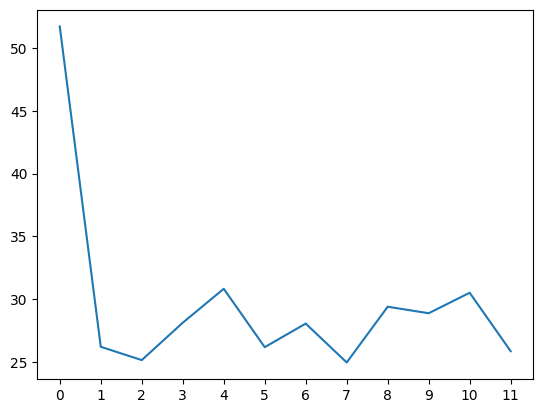

Dataset: en_49 - Features: firstfix_dur


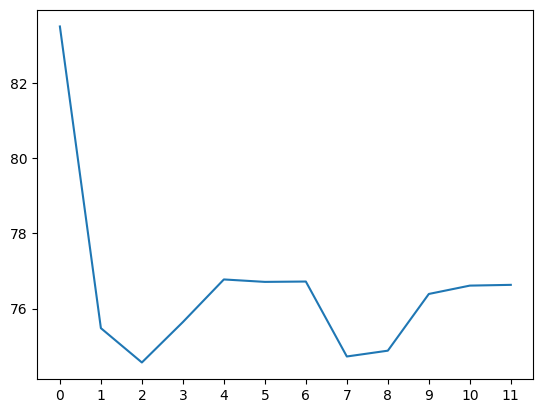

Dataset: en_49 - Features: firstrun_dur


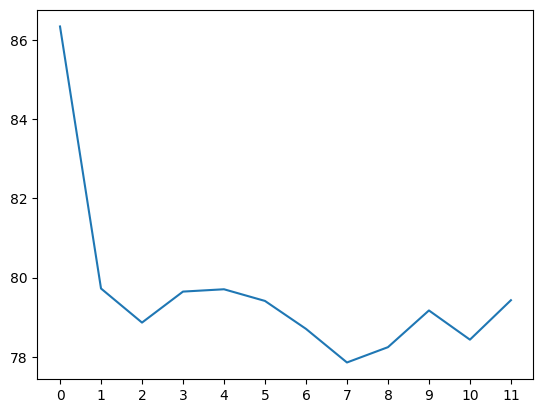

Dataset: en_49 - Features: dur


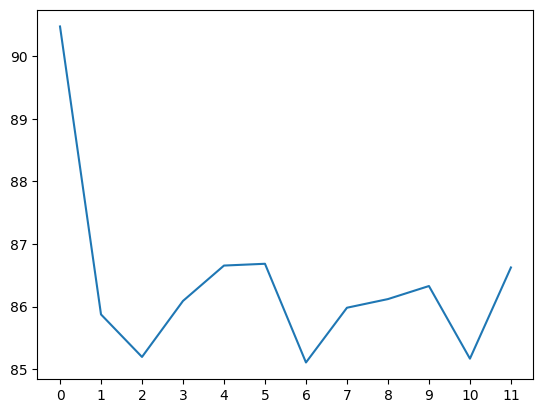

Dataset: en_49 - Features: firstrun_nfix


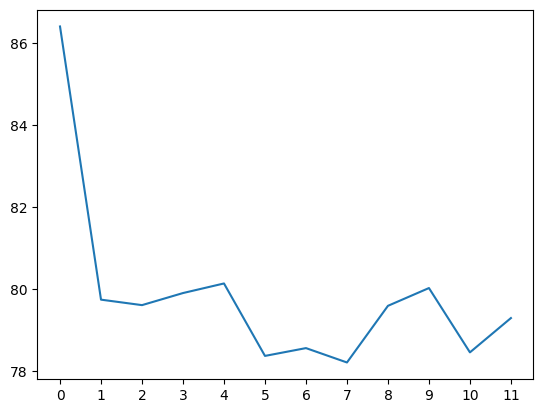

Dataset: en_49 - Features: nfix


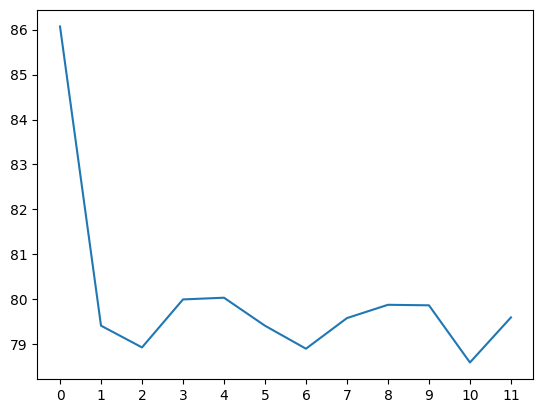

Dataset: en_49 - Features: refix


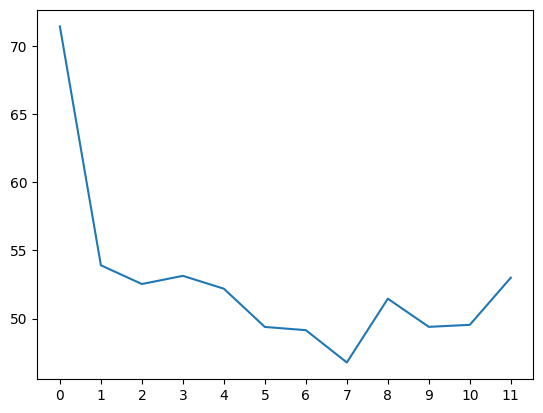

Dataset: en_49 - Features: reread


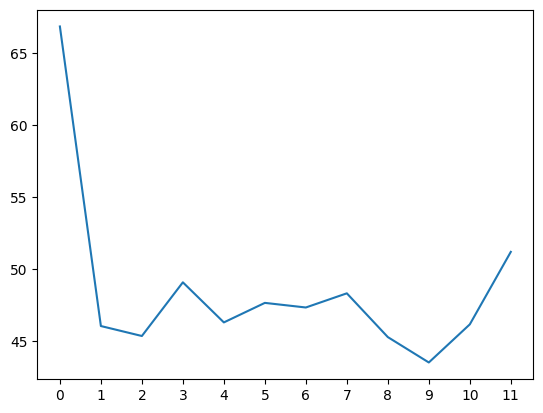

Dataset: en_49 - mean over features


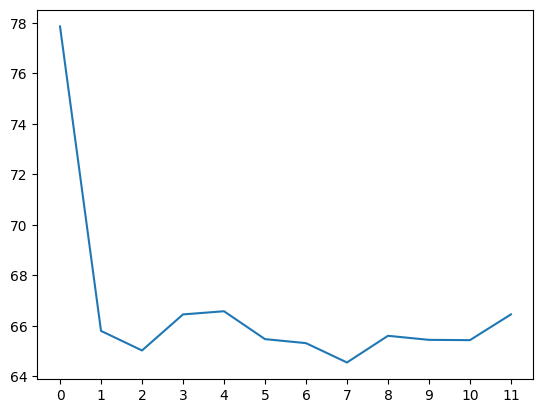

Dataset: en_83 - Features: skip


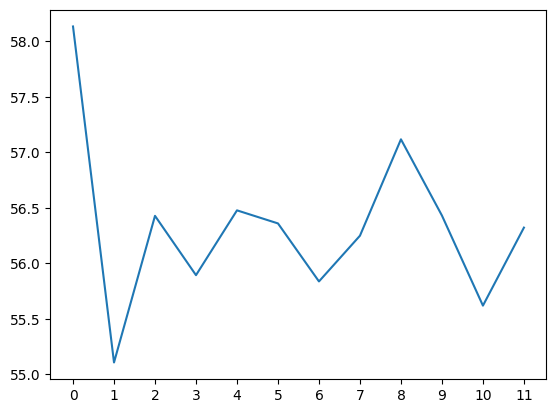

Dataset: en_83 - Features: firstfix_dur


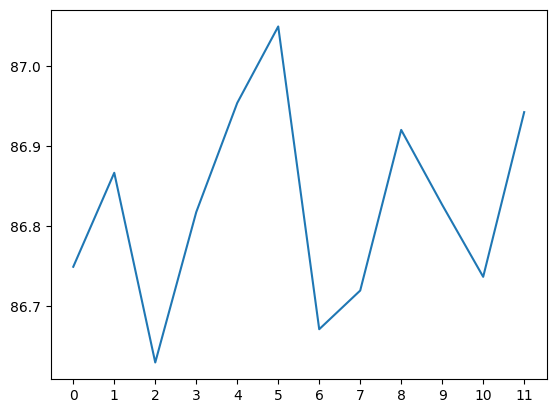

Dataset: en_83 - Features: firstrun_dur


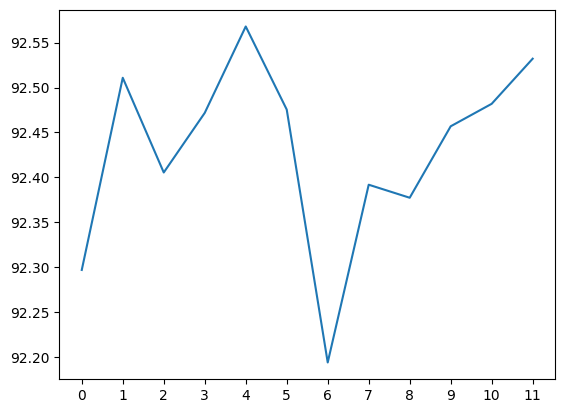

Dataset: en_83 - Features: dur


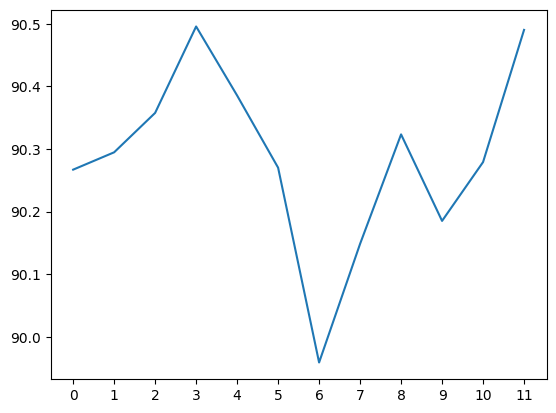

Dataset: en_83 - Features: firstrun_nfix


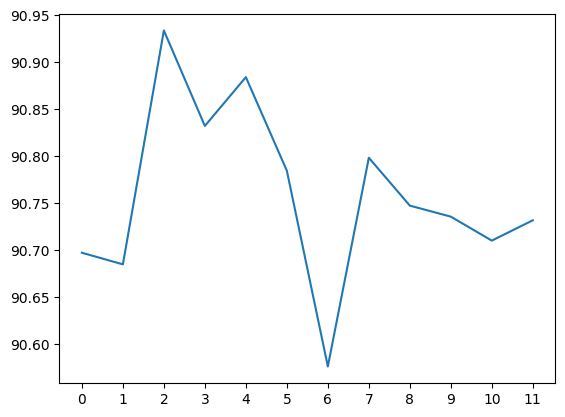

Dataset: en_83 - Features: nfix


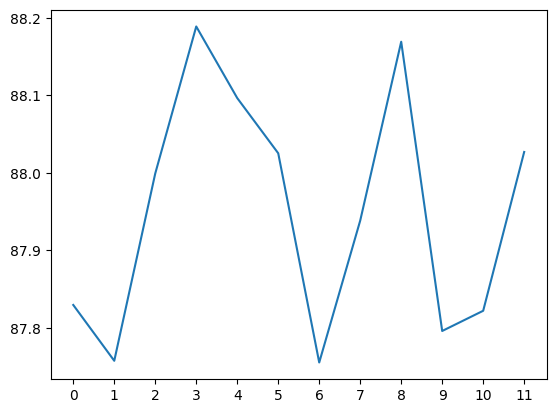

Dataset: en_83 - Features: refix


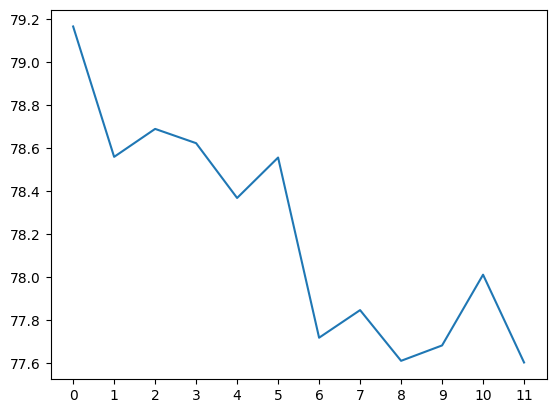

Dataset: en_83 - Features: reread


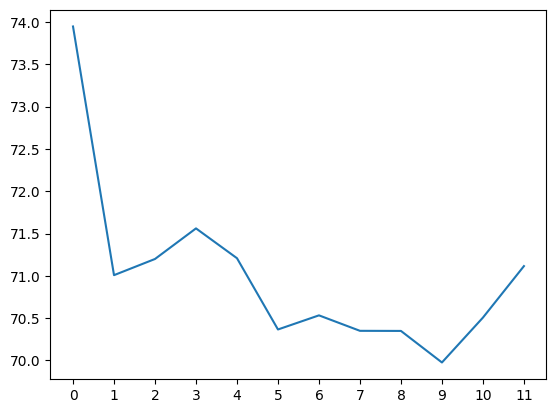

Dataset: en_83 - mean over features


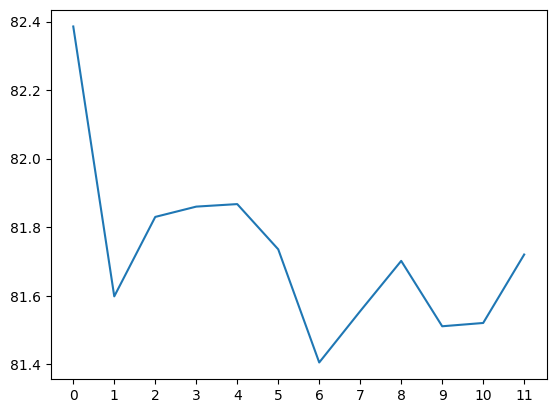

Dataset: en_98 - Features: skip


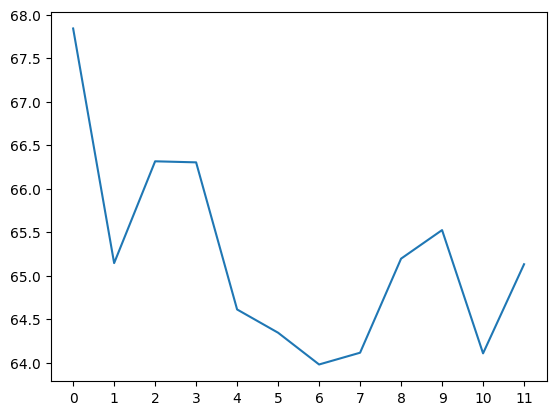

Dataset: en_98 - Features: firstfix_dur


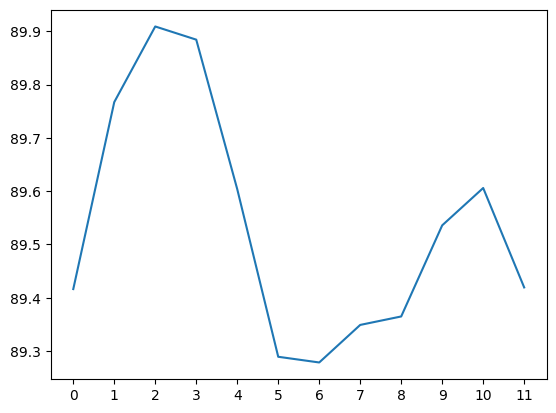

Dataset: en_98 - Features: firstrun_dur


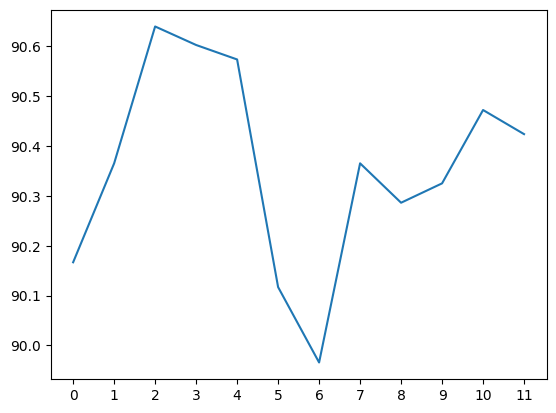

Dataset: en_98 - Features: dur


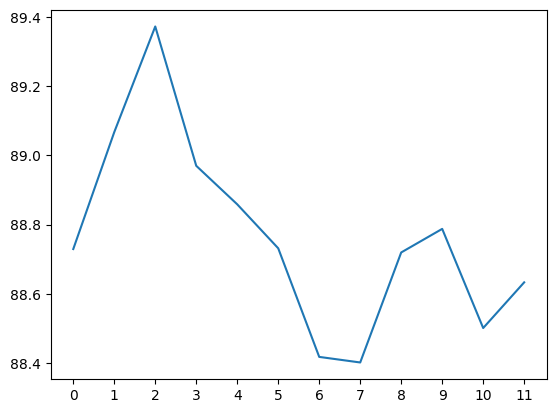

Dataset: en_98 - Features: firstrun_nfix


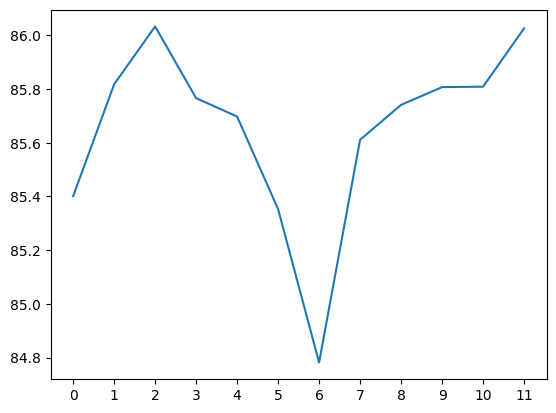

Dataset: en_98 - Features: nfix


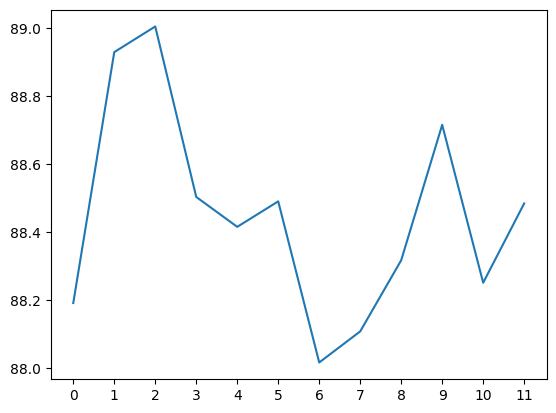

Dataset: en_98 - Features: refix


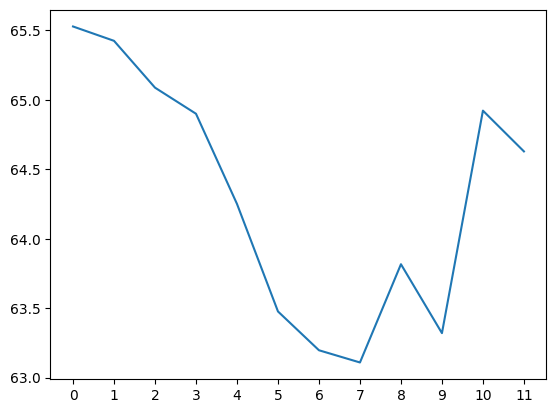

Dataset: en_98 - Features: reread


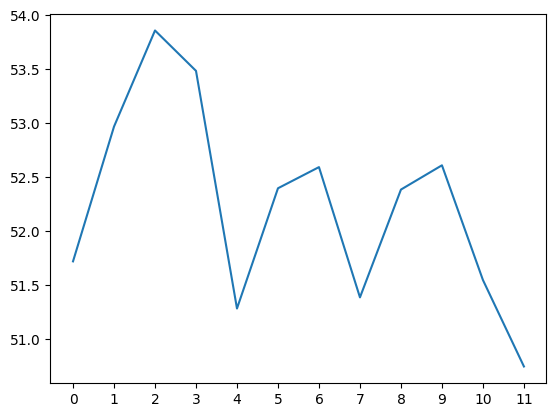

Dataset: en_98 - mean over features


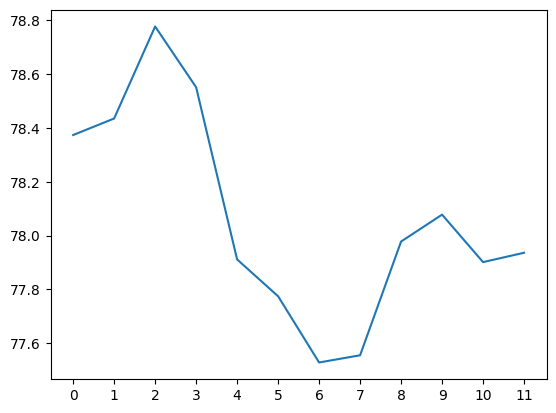

Dataset: en_6 - Features: skip


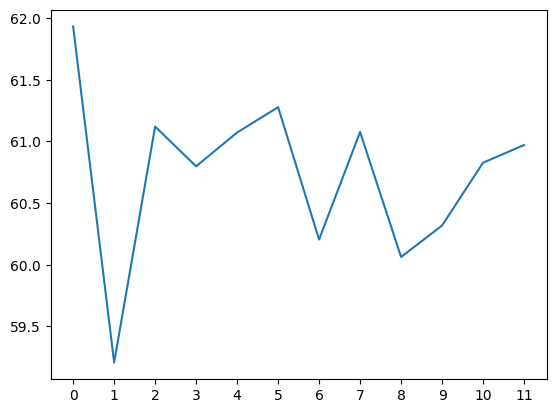

Dataset: en_6 - Features: firstfix_dur


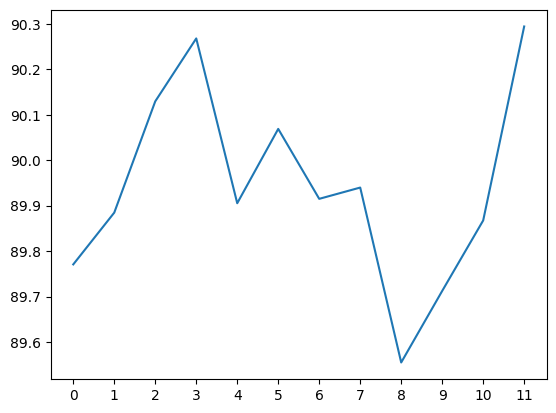

Dataset: en_6 - Features: firstrun_dur


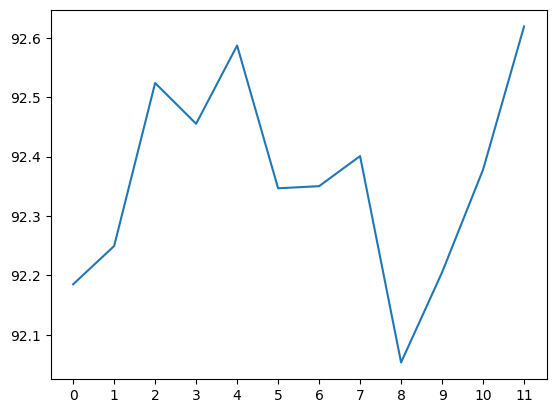

Dataset: en_6 - Features: dur


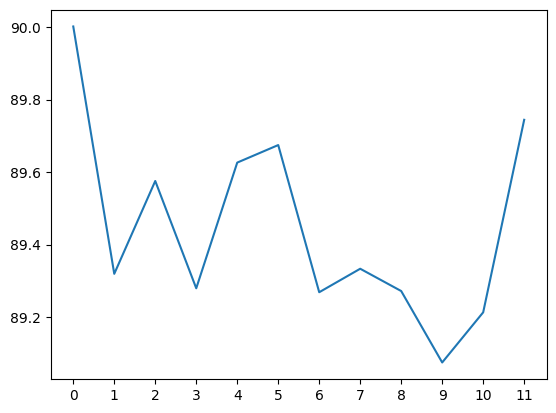

Dataset: en_6 - Features: firstrun_nfix


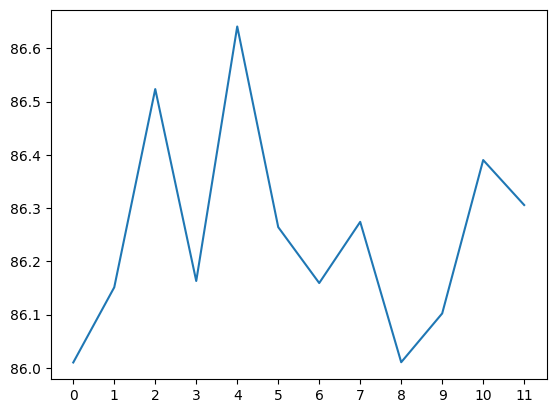

Dataset: en_6 - Features: nfix


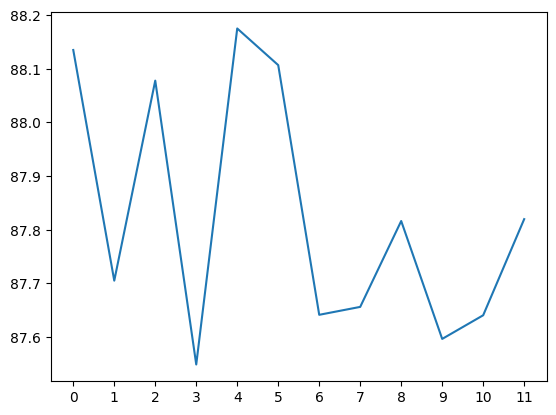

Dataset: en_6 - Features: refix


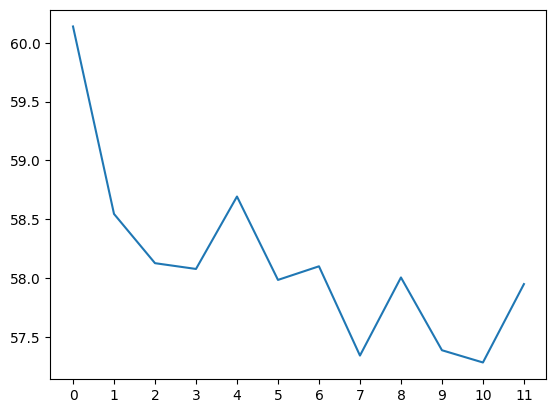

Dataset: en_6 - Features: reread


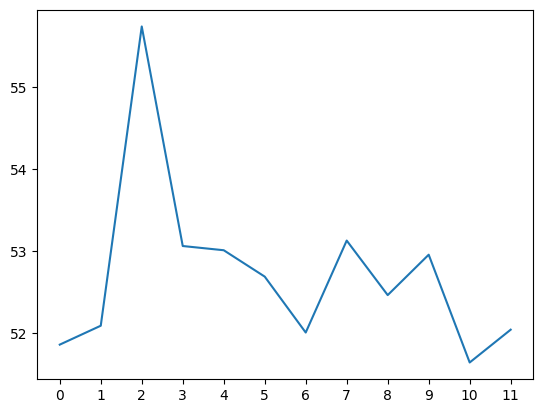

Dataset: en_6 - mean over features


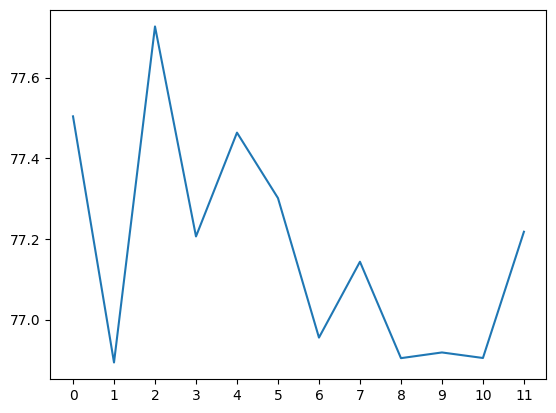

Dataset: en_57 - Features: skip


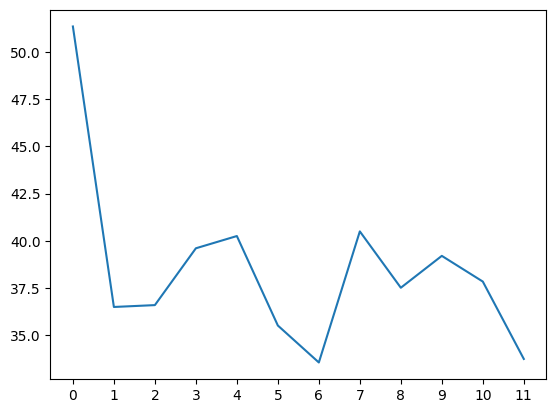

Dataset: en_57 - Features: firstfix_dur


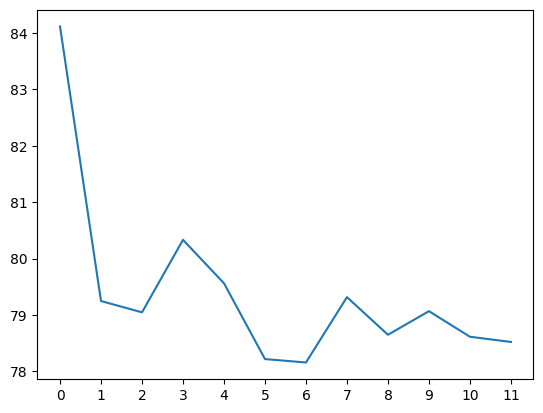

Dataset: en_57 - Features: firstrun_dur


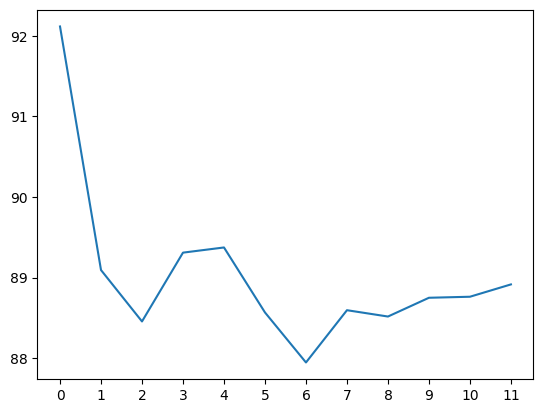

Dataset: en_57 - Features: dur


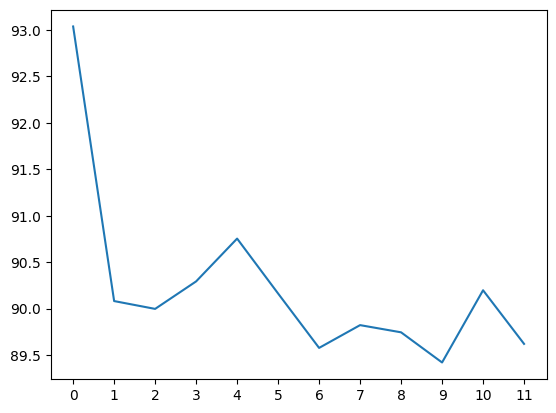

Dataset: en_57 - Features: firstrun_nfix


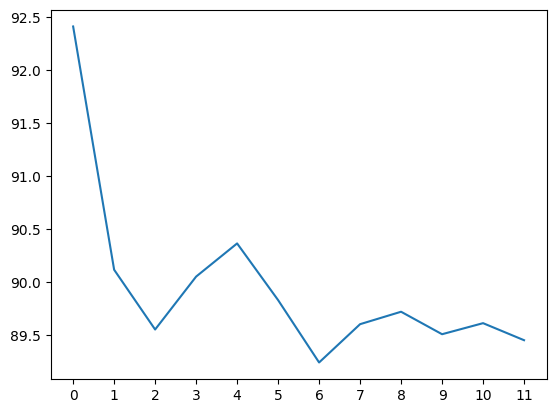

Dataset: en_57 - Features: nfix


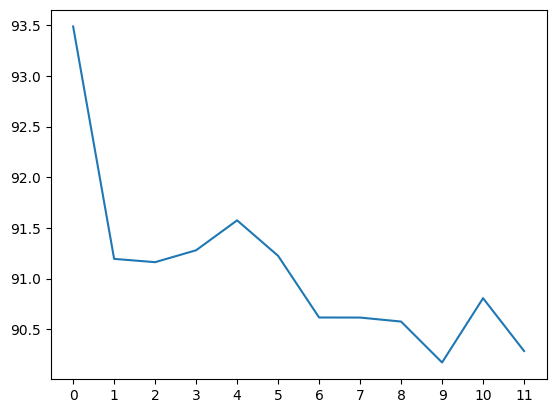

Dataset: en_57 - Features: refix


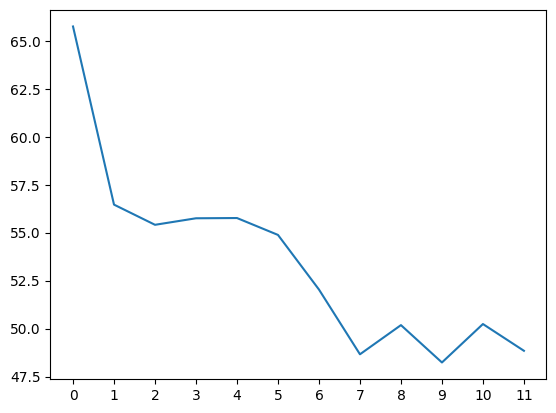

Dataset: en_57 - Features: reread


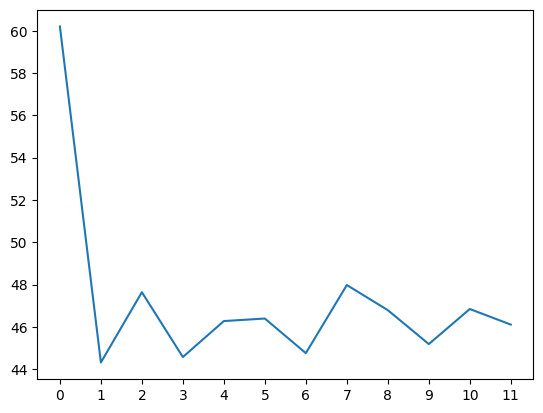

Dataset: en_57 - mean over features


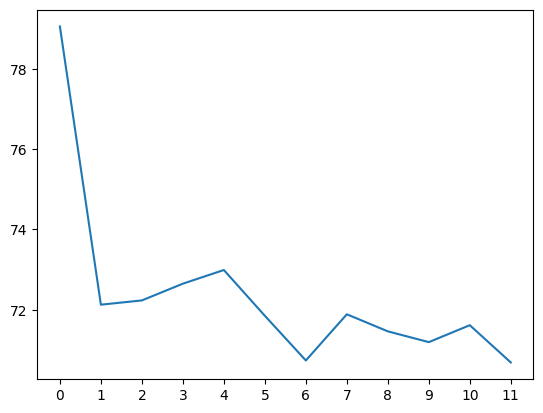

In [4]:
print_probe_results(dict_res_roberta)

## CAMEM Results

Dataset: it_43 - Features: skip


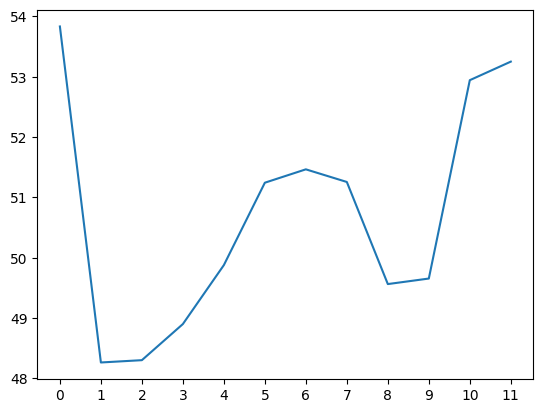

Dataset: it_43 - Features: firstfix_dur


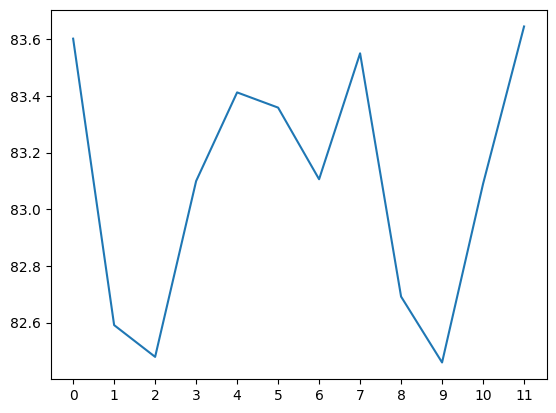

Dataset: it_43 - Features: firstrun_dur


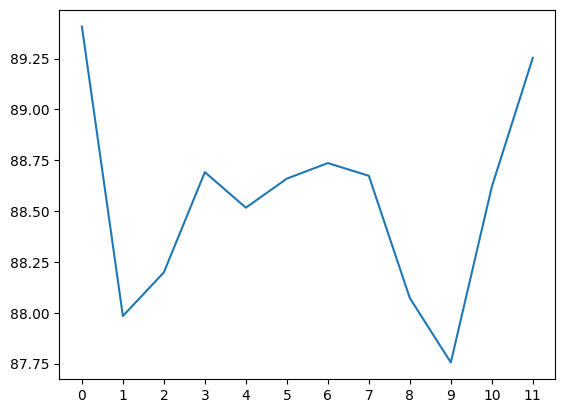

Dataset: it_43 - Features: dur


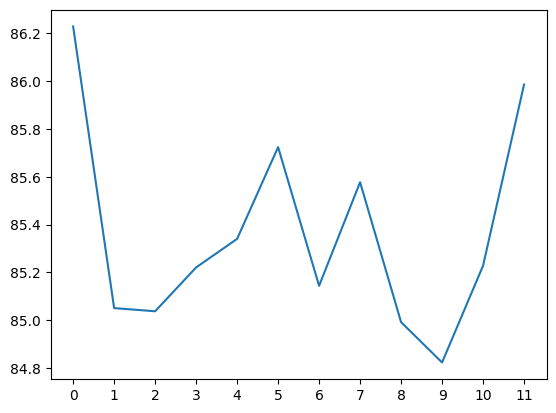

Dataset: it_43 - Features: firstrun_nfix


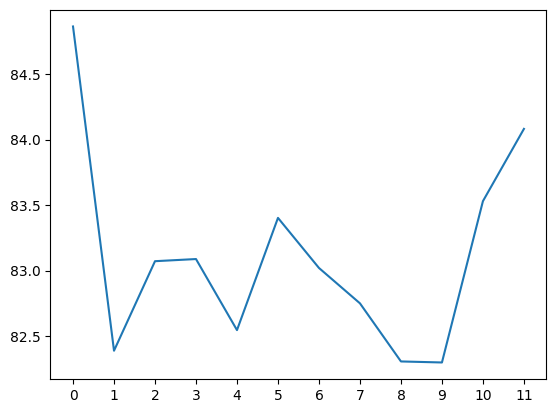

Dataset: it_43 - Features: nfix


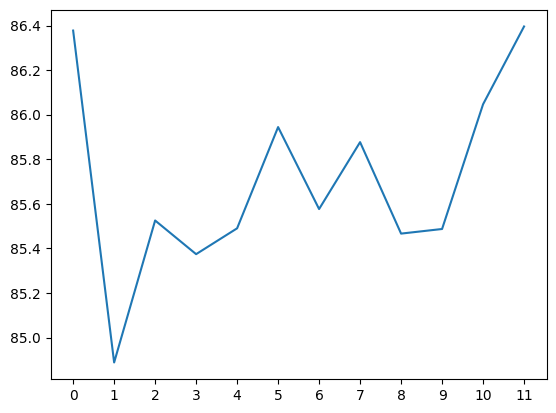

Dataset: it_43 - Features: refix


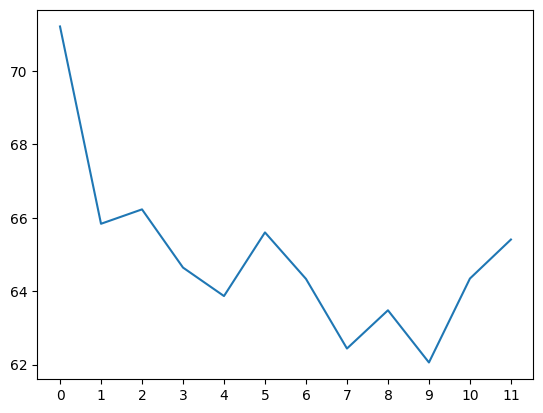

Dataset: it_43 - Features: reread


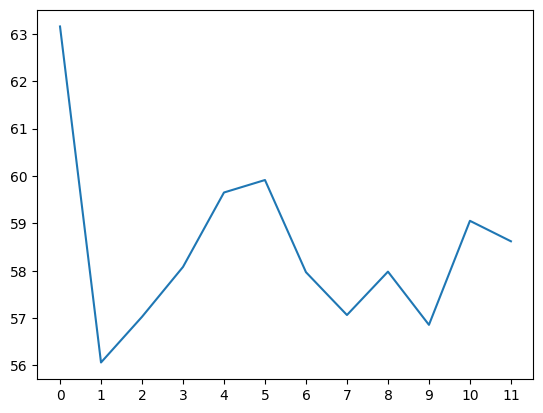

Dataset: it_43 - mean over features


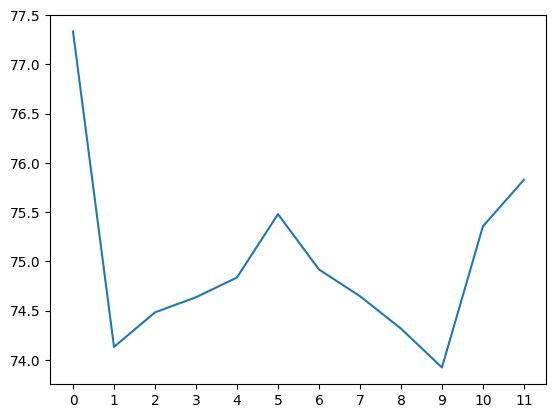

Dataset: it_26 - Features: skip


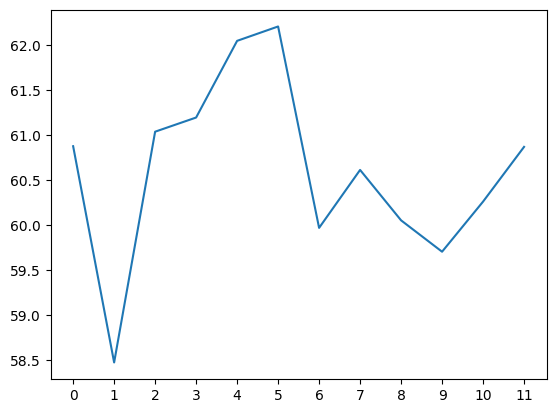

Dataset: it_26 - Features: firstfix_dur


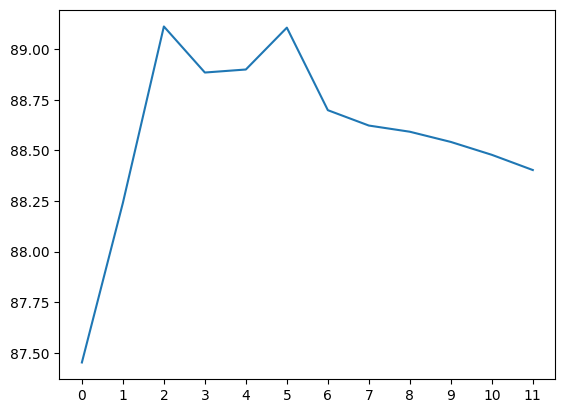

Dataset: it_26 - Features: firstrun_dur


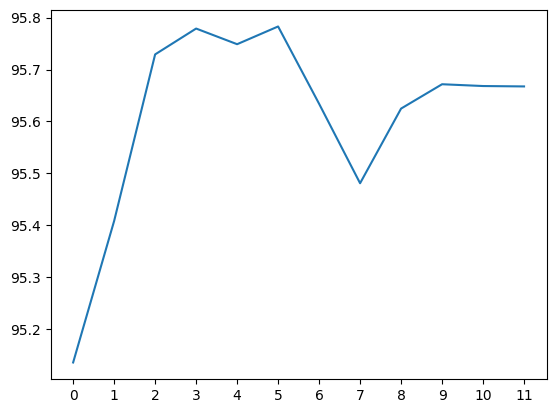

Dataset: it_26 - Features: dur


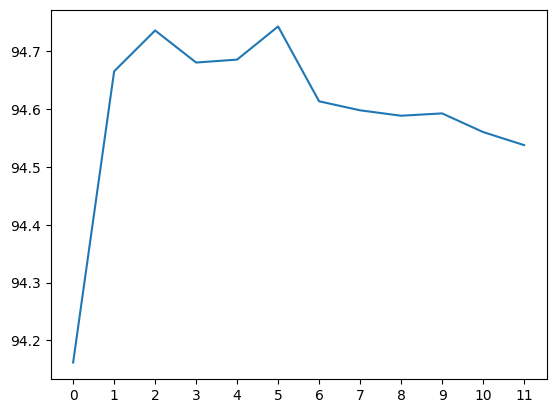

Dataset: it_26 - Features: firstrun_nfix


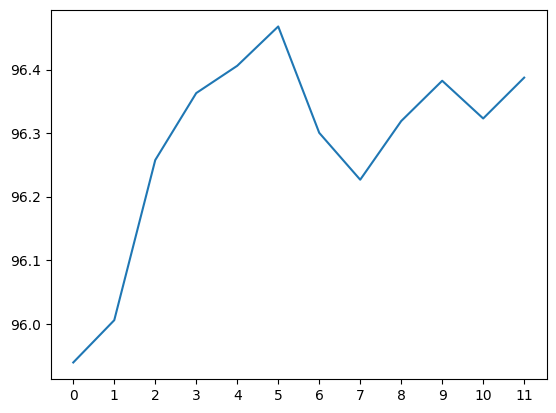

Dataset: it_26 - Features: nfix


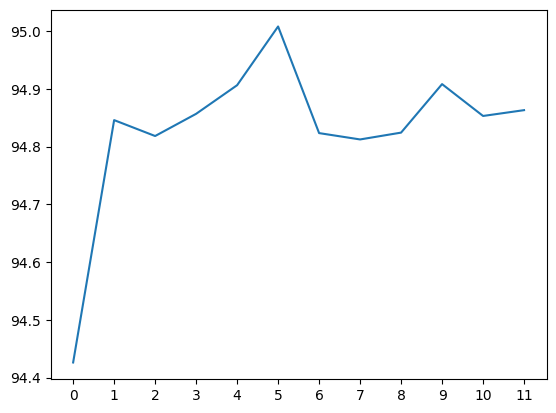

Dataset: it_26 - Features: refix


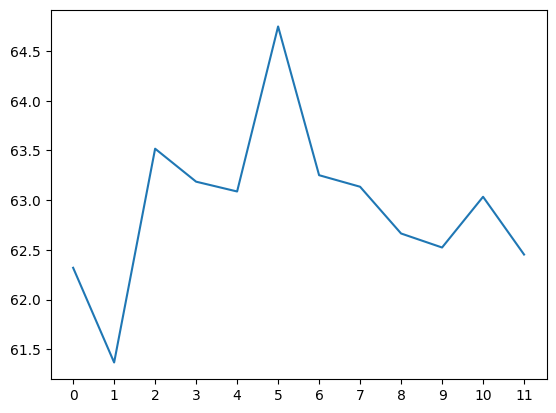

Dataset: it_26 - Features: reread


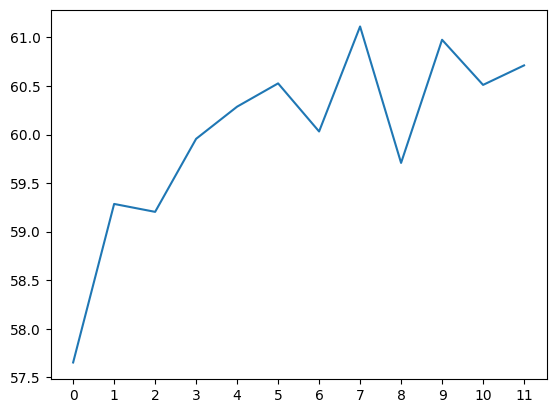

Dataset: it_26 - mean over features


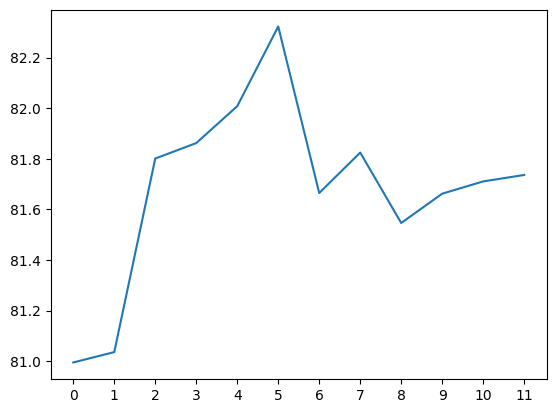

Dataset: it_1 - Features: skip


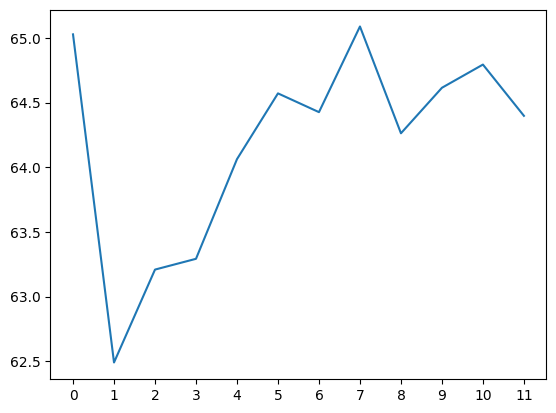

Dataset: it_1 - Features: firstfix_dur


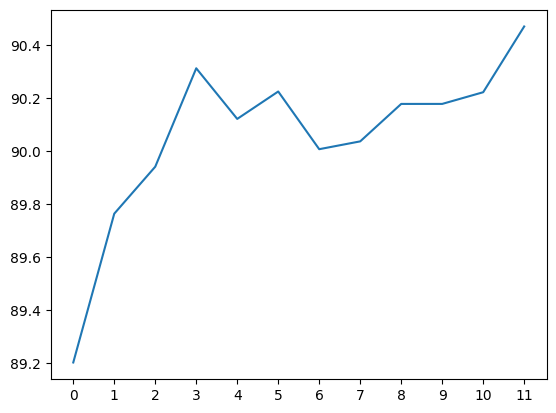

Dataset: it_1 - Features: firstrun_dur


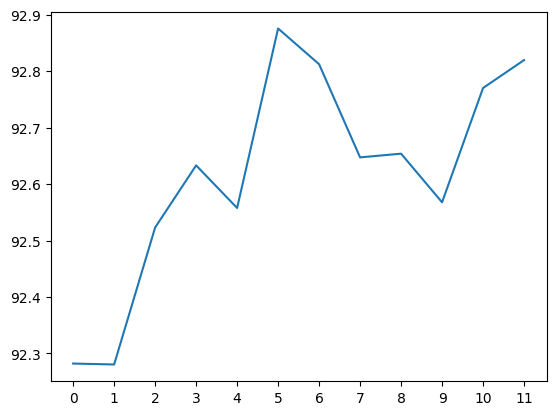

Dataset: it_1 - Features: dur


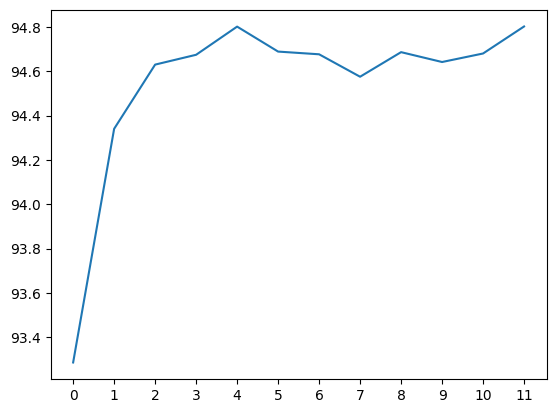

Dataset: it_1 - Features: firstrun_nfix


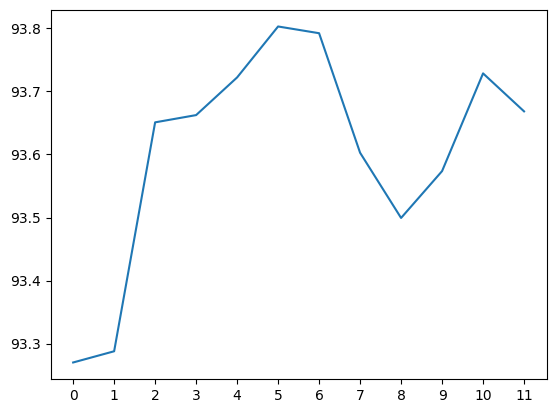

Dataset: it_1 - Features: nfix


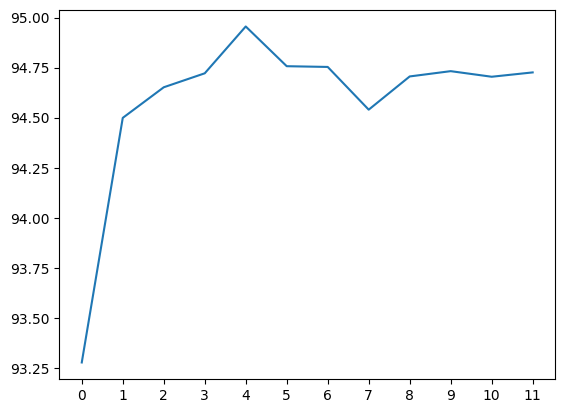

Dataset: it_1 - Features: refix


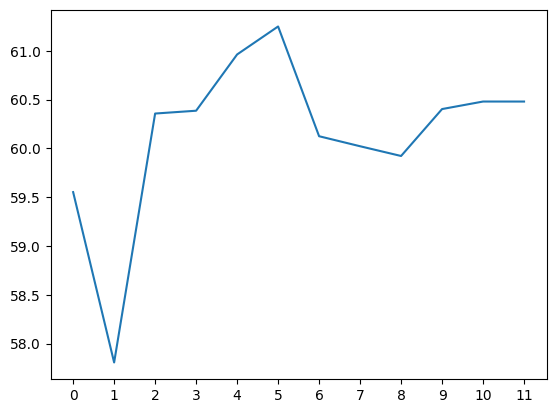

Dataset: it_1 - Features: reread


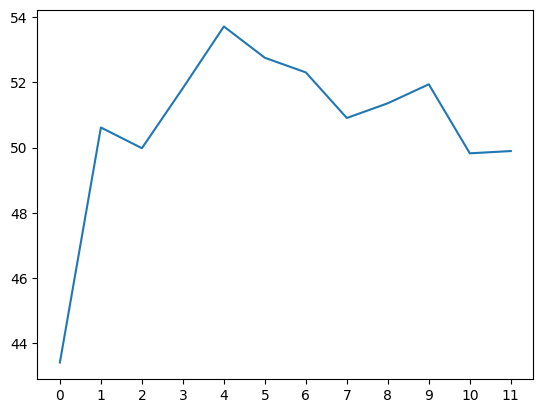

Dataset: it_1 - mean over features


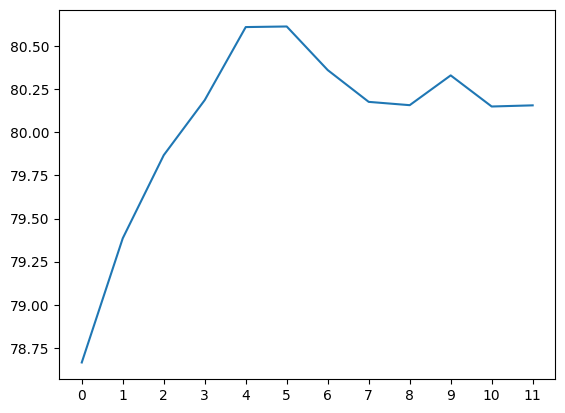

Dataset: it_38 - Features: skip


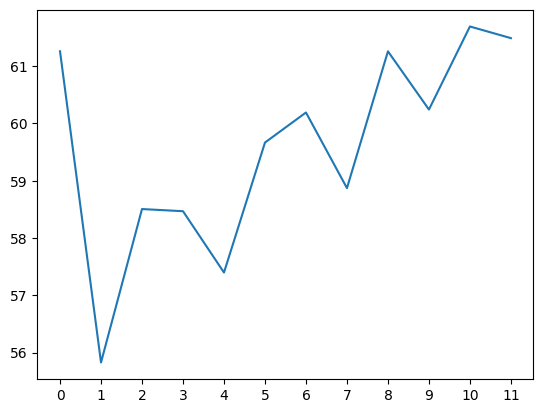

Dataset: it_38 - Features: firstfix_dur


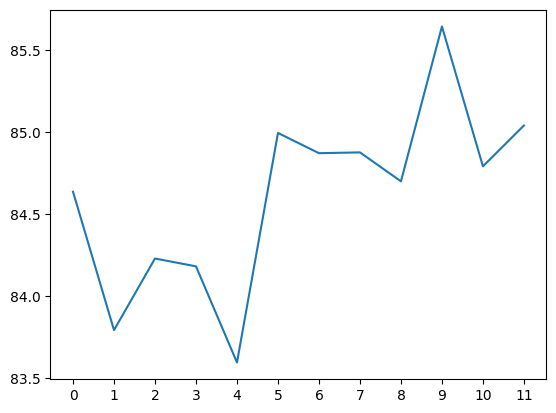

Dataset: it_38 - Features: firstrun_dur


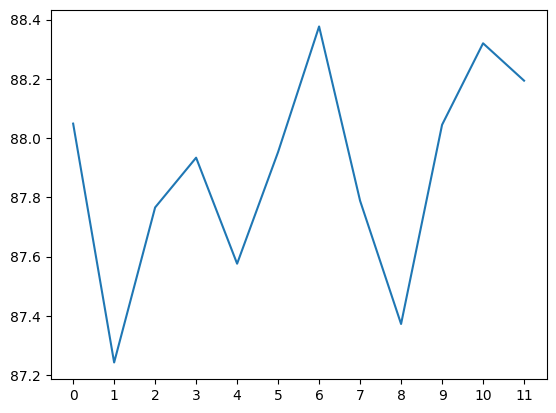

Dataset: it_38 - Features: dur


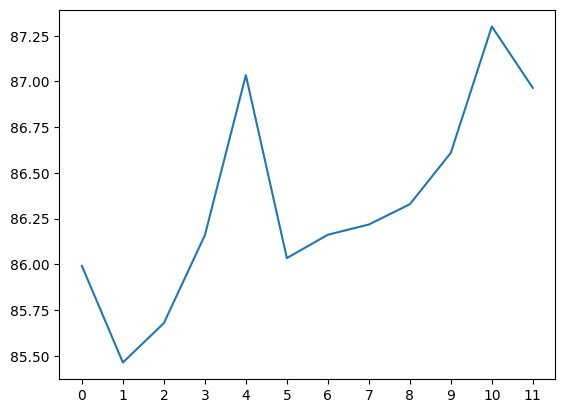

Dataset: it_38 - Features: firstrun_nfix


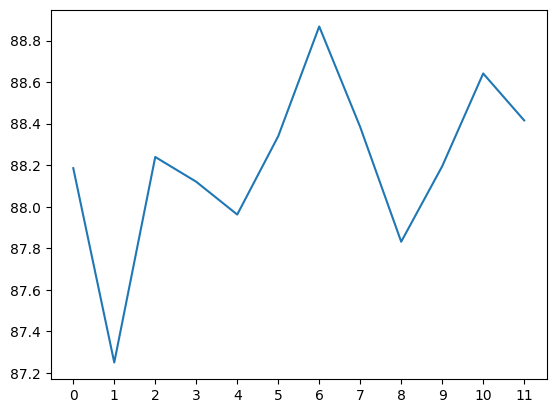

Dataset: it_38 - Features: nfix


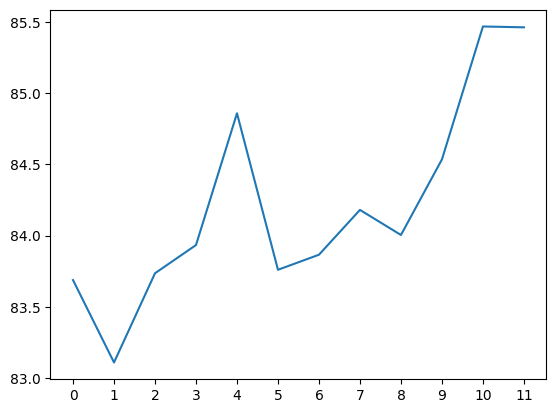

Dataset: it_38 - Features: refix


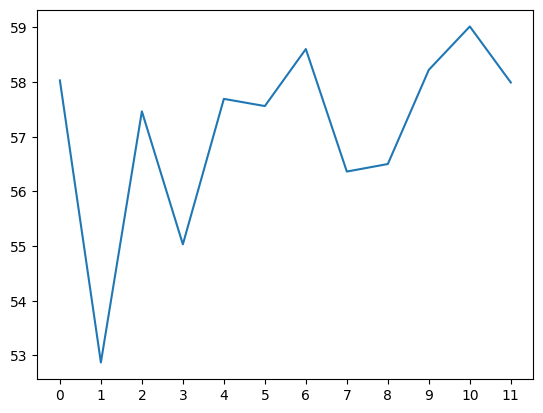

Dataset: it_38 - Features: reread


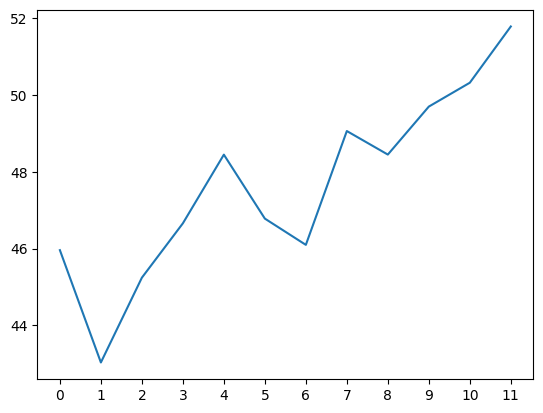

Dataset: it_38 - mean over features


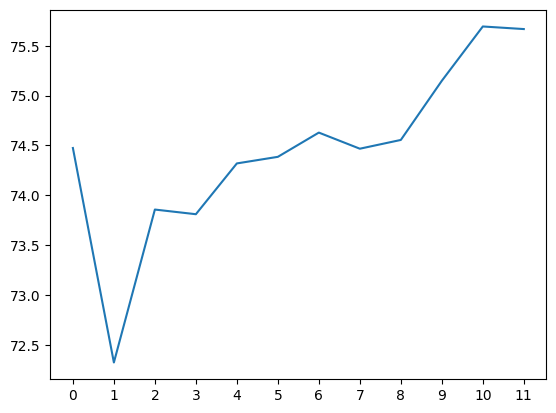

Dataset: it_44 - Features: skip


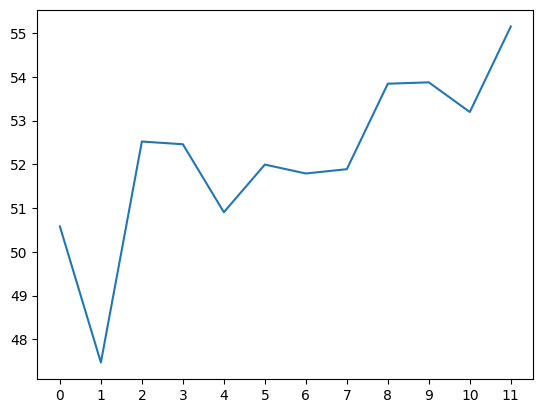

Dataset: it_44 - Features: firstfix_dur


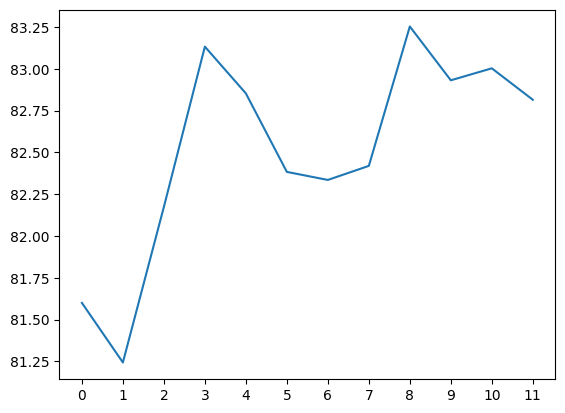

Dataset: it_44 - Features: firstrun_dur


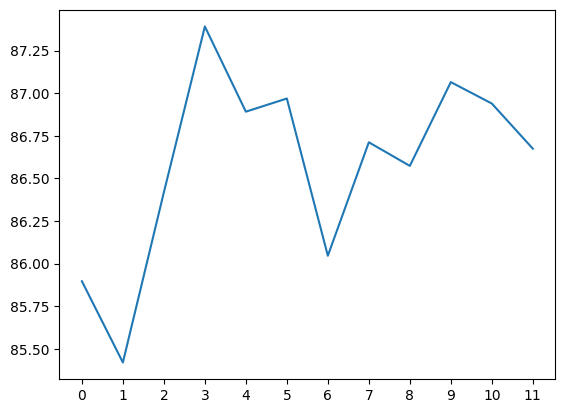

Dataset: it_44 - Features: dur


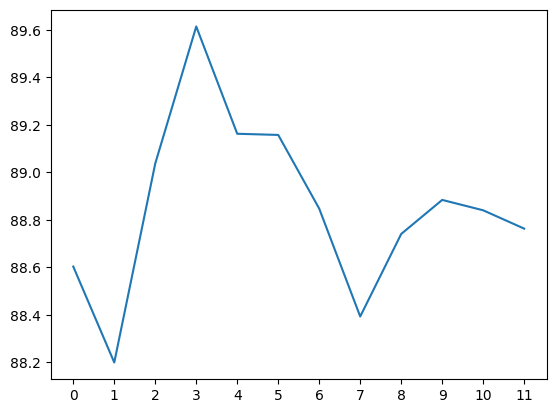

Dataset: it_44 - Features: firstrun_nfix


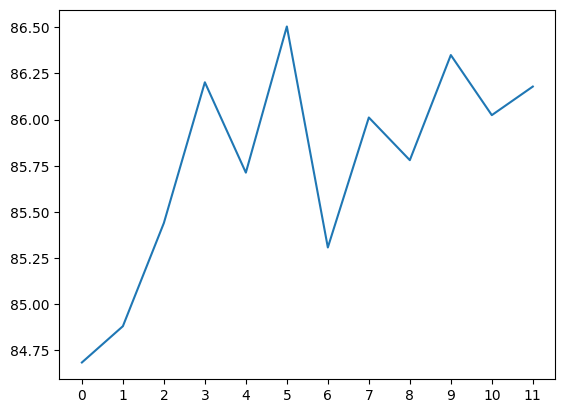

Dataset: it_44 - Features: nfix


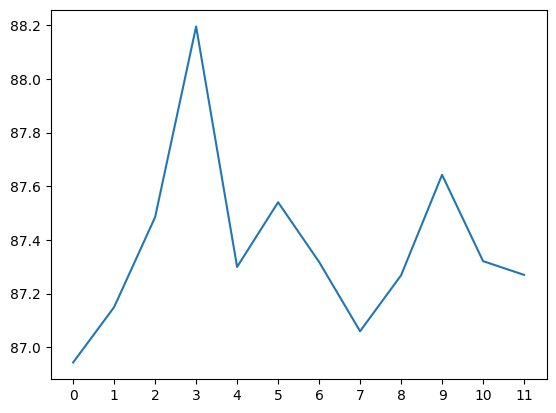

Dataset: it_44 - Features: refix


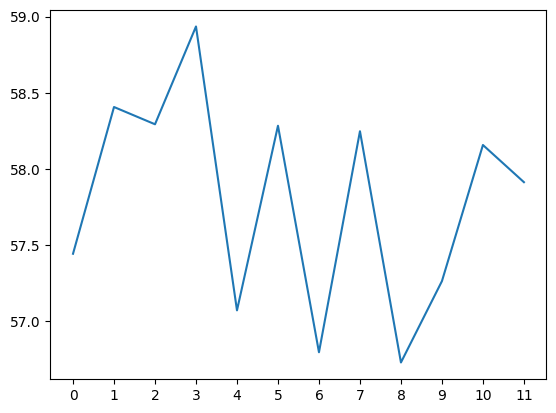

Dataset: it_44 - Features: reread


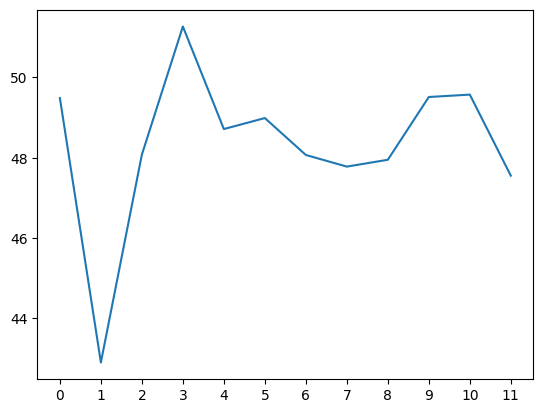

Dataset: it_44 - mean over features


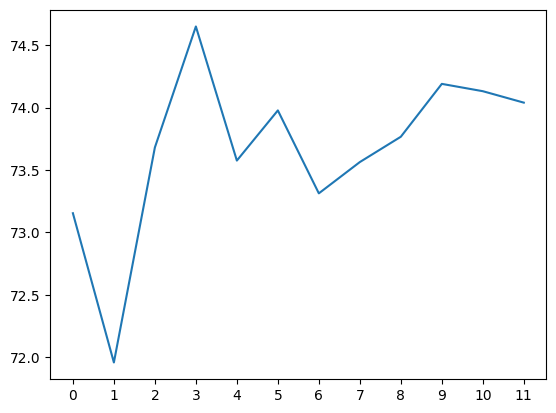

In [5]:
print_probe_results(dict_res_camem)

## XLM Results

Dataset: it_26 - Features: skip


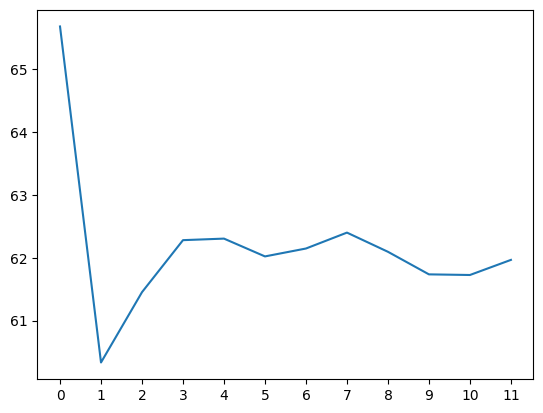

Dataset: it_26 - Features: firstfix_dur


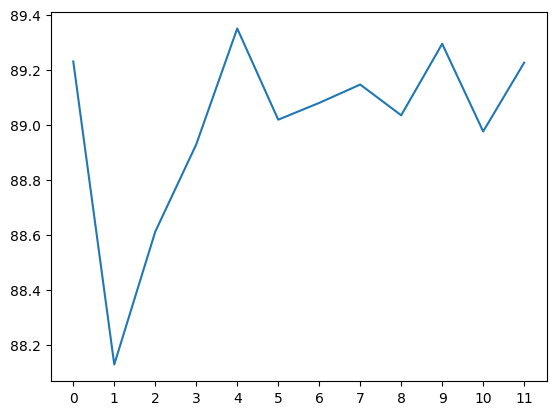

Dataset: it_26 - Features: firstrun_dur


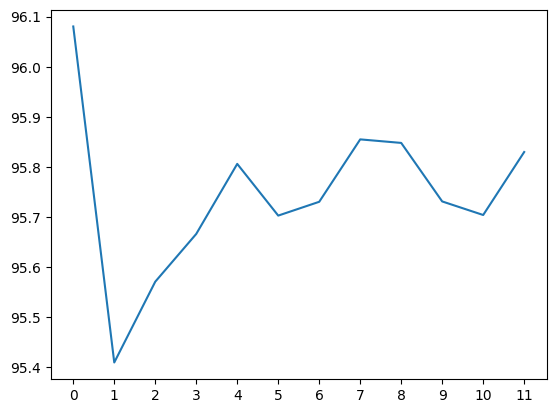

Dataset: it_26 - Features: dur


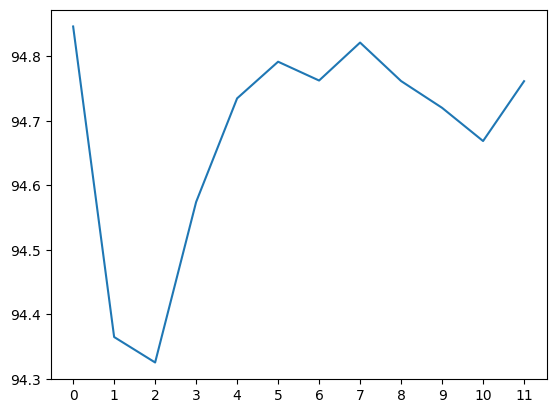

Dataset: it_26 - Features: firstrun_nfix


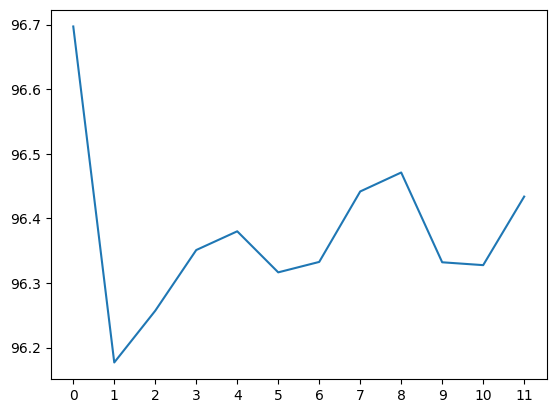

Dataset: it_26 - Features: nfix


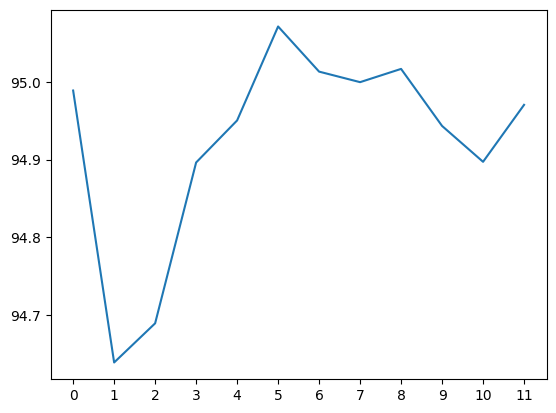

Dataset: it_26 - Features: refix


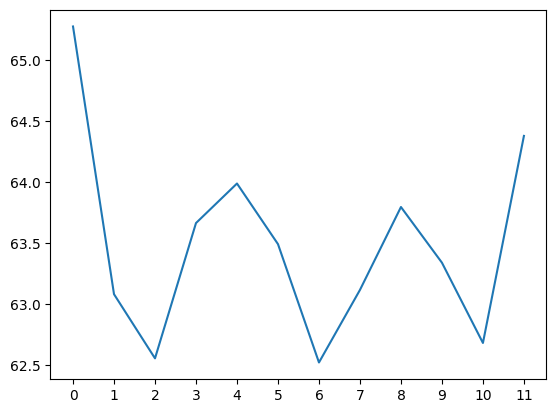

Dataset: it_26 - Features: reread


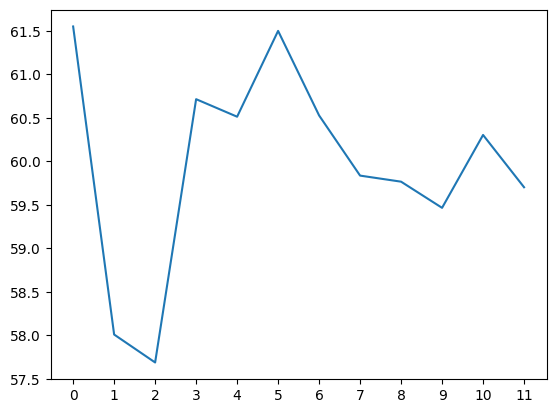

Dataset: it_26 - mean over features


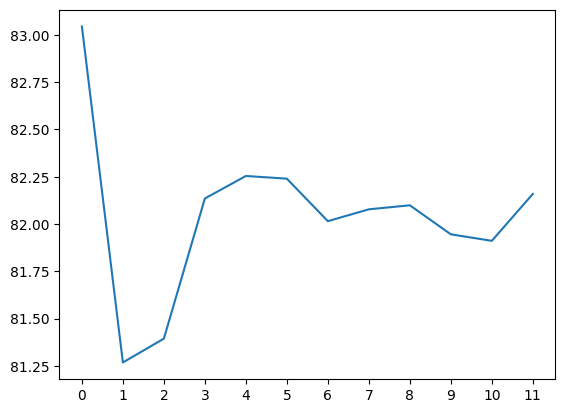

Dataset: it_43 - Features: skip


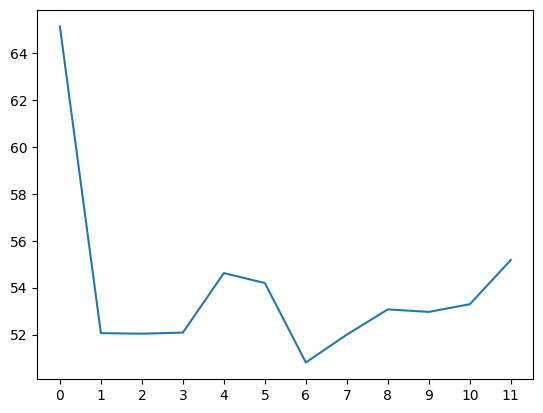

Dataset: it_43 - Features: firstfix_dur


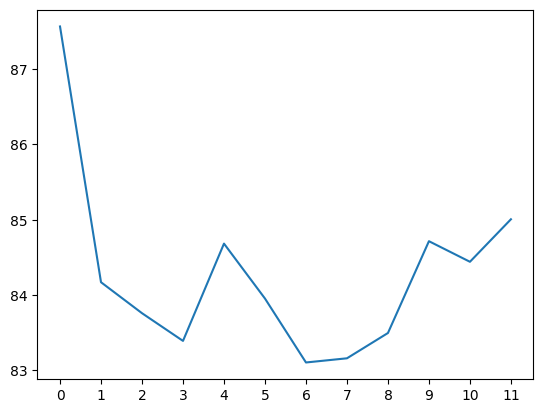

Dataset: it_43 - Features: firstrun_dur


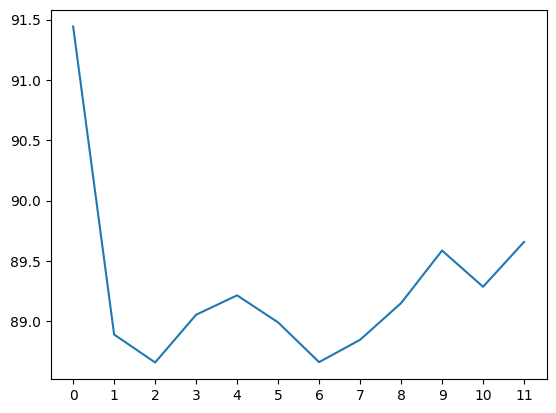

Dataset: it_43 - Features: dur


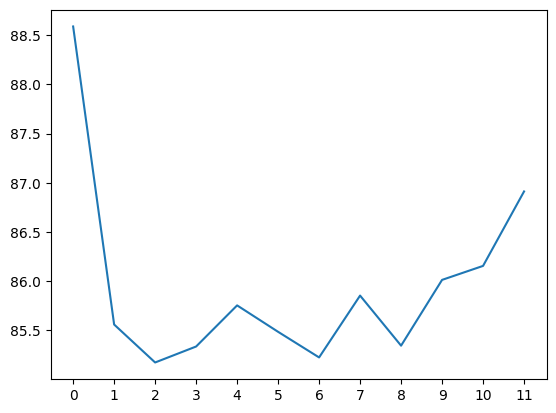

Dataset: it_43 - Features: firstrun_nfix


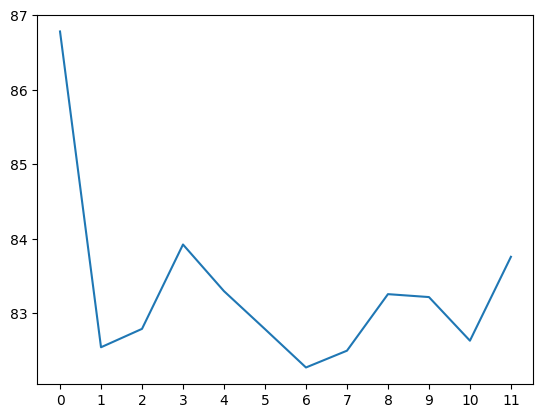

Dataset: it_43 - Features: nfix


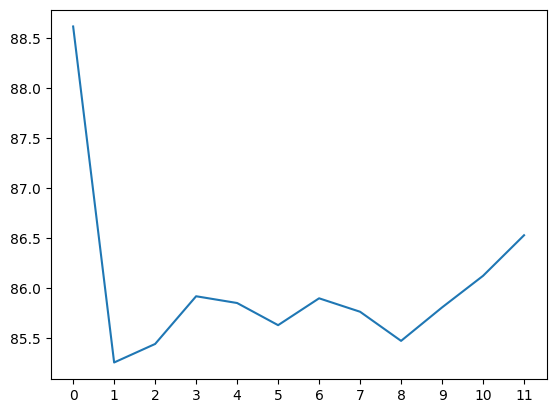

Dataset: it_43 - Features: refix


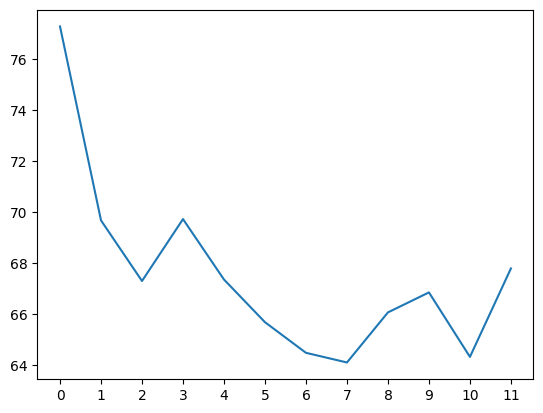

Dataset: it_43 - Features: reread


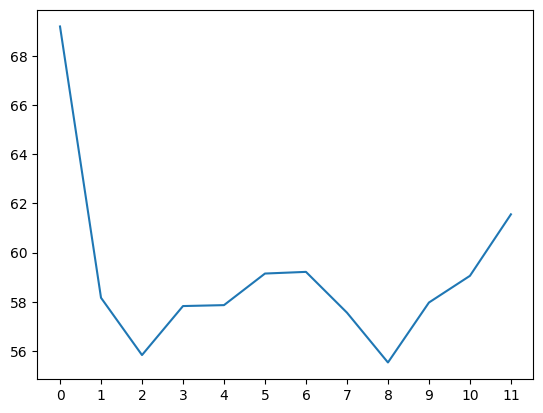

Dataset: it_43 - mean over features


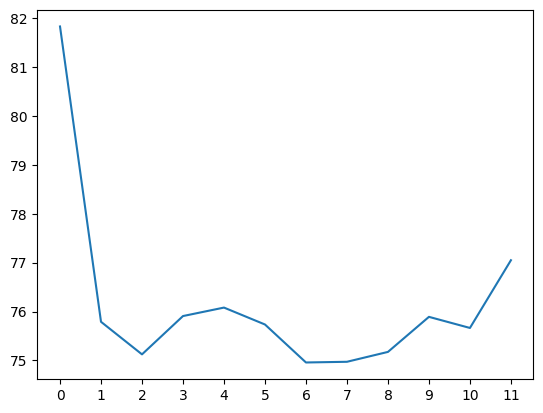

Dataset: en_49 - Features: skip


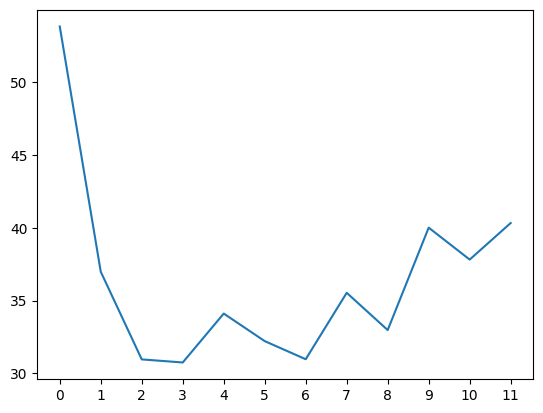

Dataset: en_49 - Features: firstfix_dur


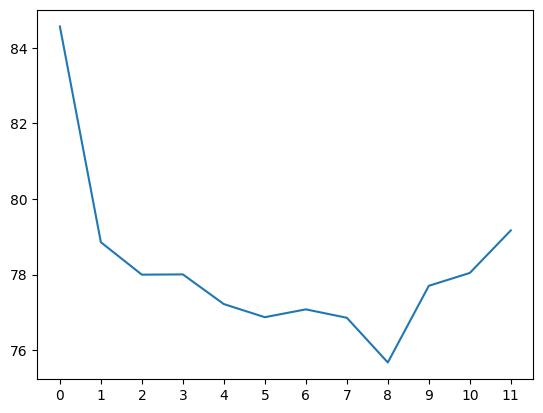

Dataset: en_49 - Features: firstrun_dur


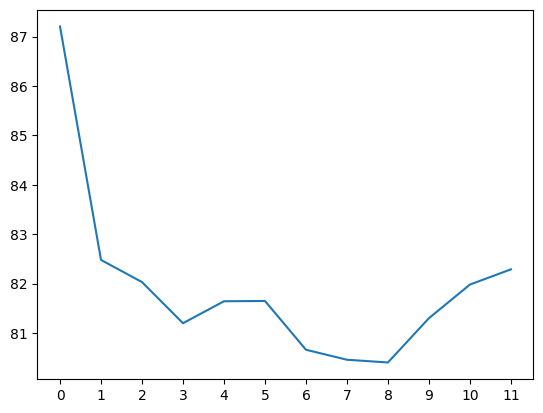

Dataset: en_49 - Features: dur


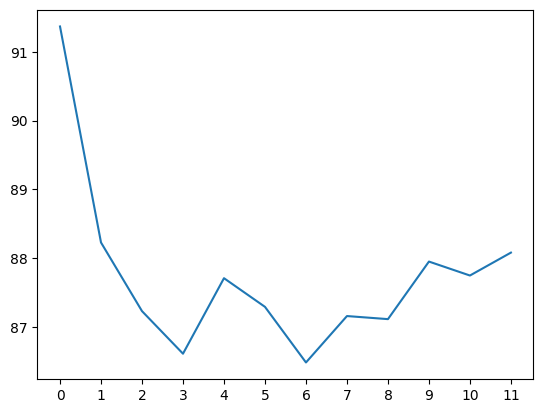

Dataset: en_49 - Features: firstrun_nfix


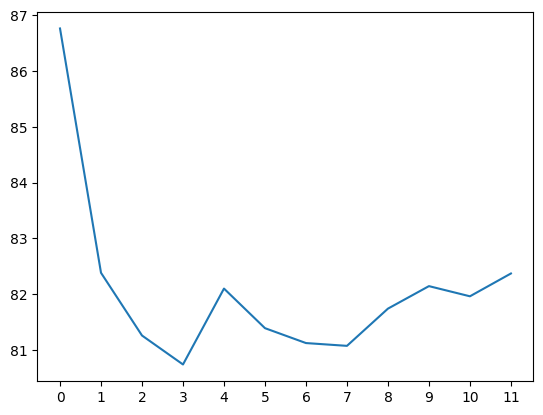

Dataset: en_49 - Features: nfix


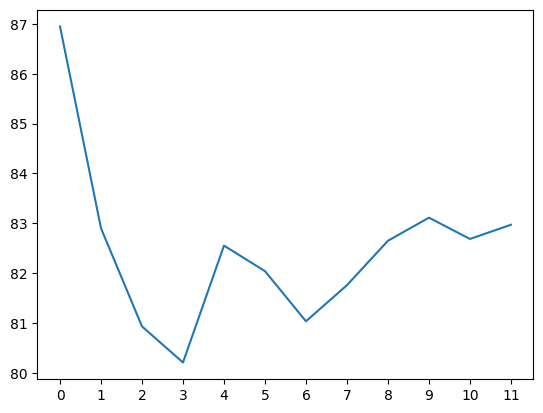

Dataset: en_49 - Features: refix


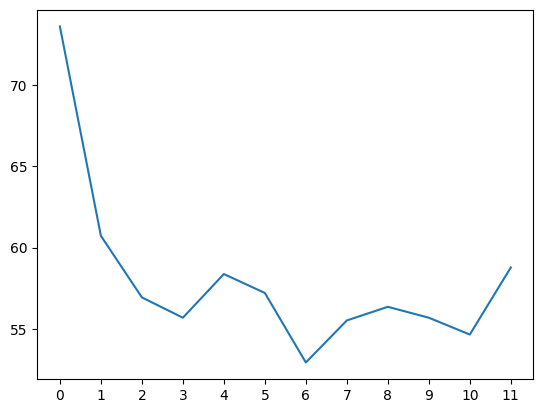

Dataset: en_49 - Features: reread


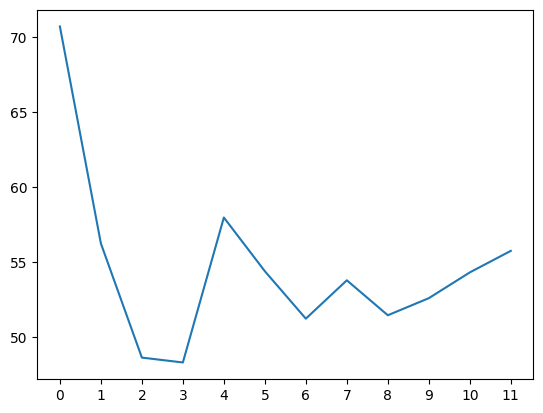

Dataset: en_49 - mean over features


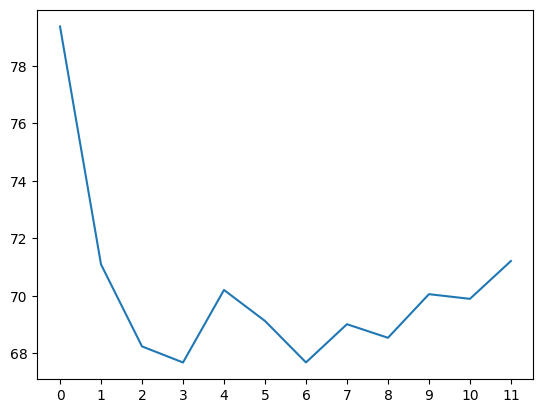

Dataset: it_44 - Features: skip


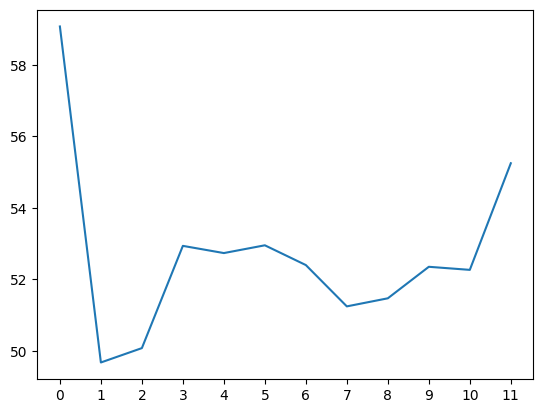

Dataset: it_44 - Features: firstfix_dur


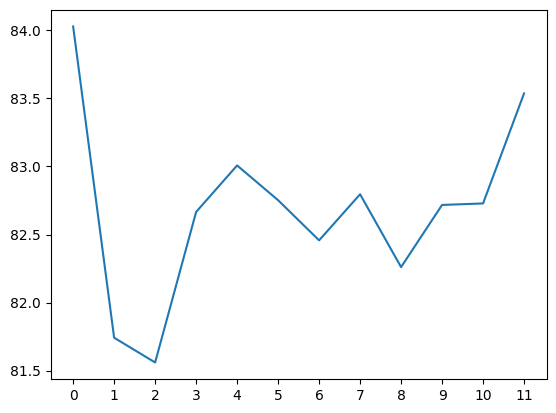

Dataset: it_44 - Features: firstrun_dur


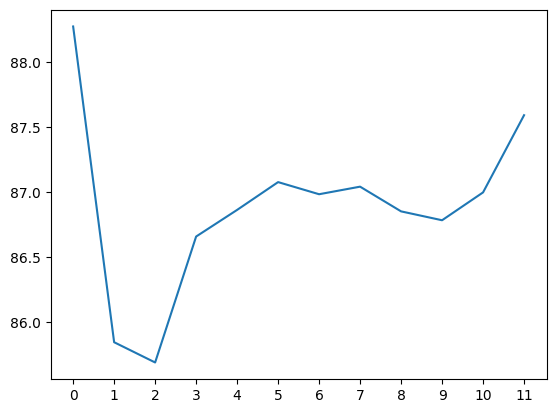

Dataset: it_44 - Features: dur


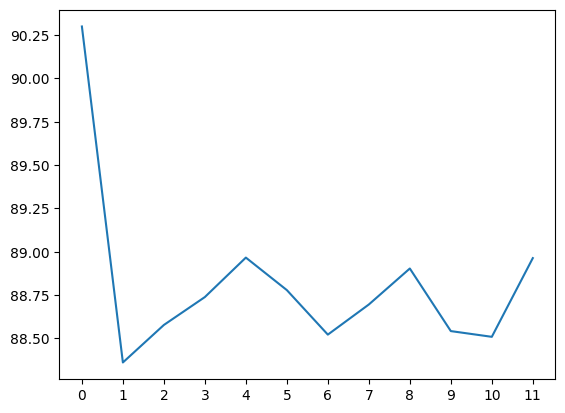

Dataset: it_44 - Features: firstrun_nfix


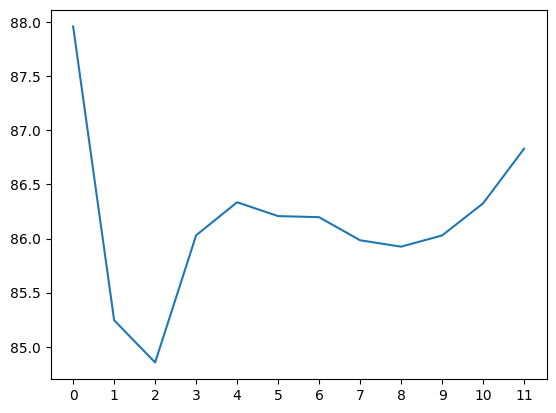

Dataset: it_44 - Features: nfix


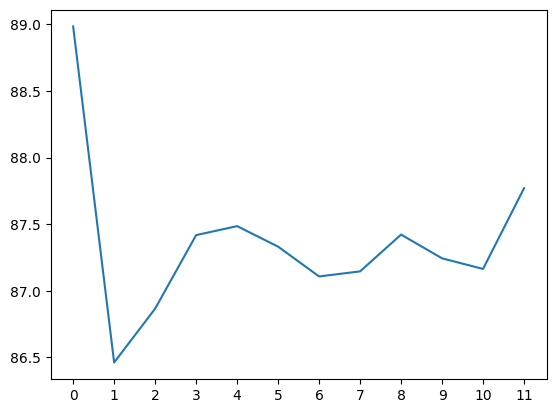

Dataset: it_44 - Features: refix


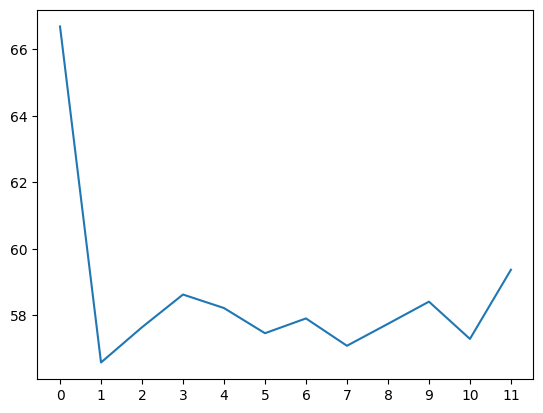

Dataset: it_44 - Features: reread


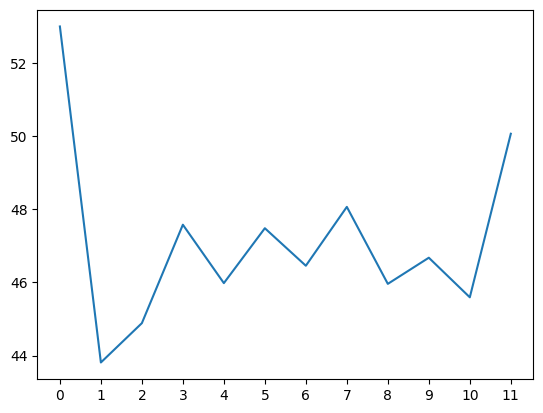

Dataset: it_44 - mean over features


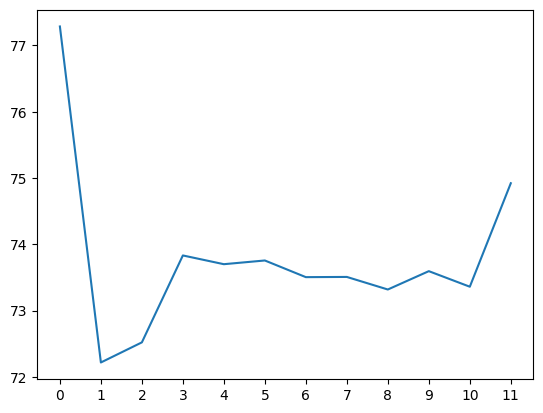

Dataset: en_98 - Features: skip


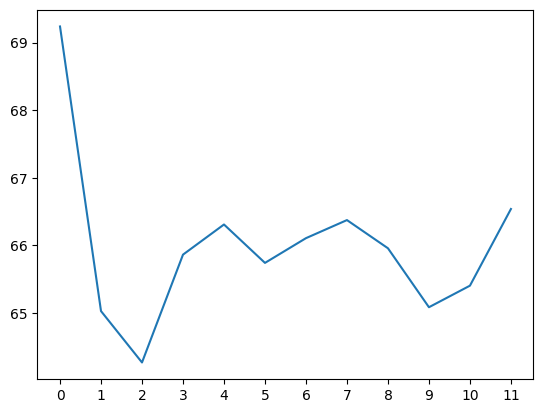

Dataset: en_98 - Features: firstfix_dur


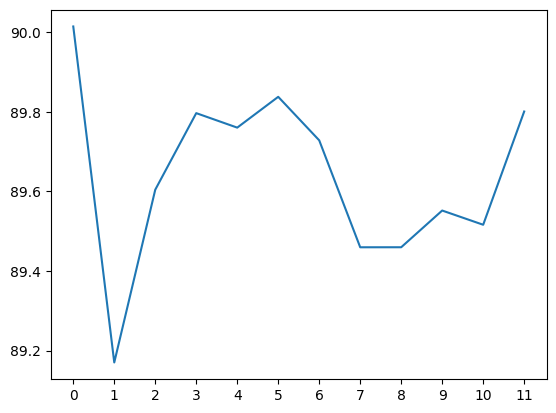

Dataset: en_98 - Features: firstrun_dur


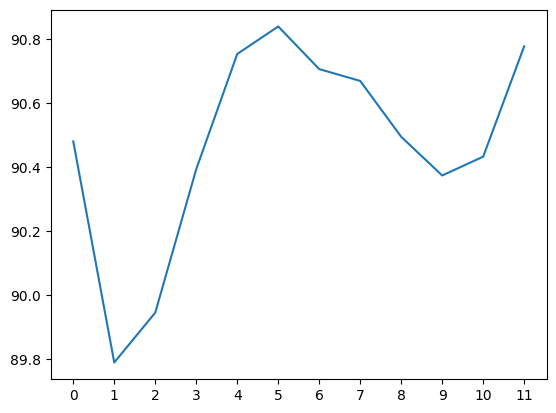

Dataset: en_98 - Features: dur


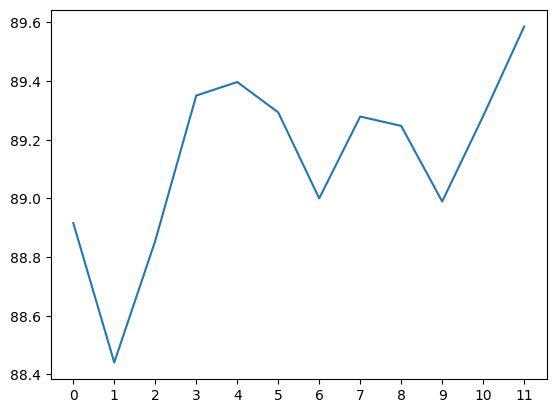

Dataset: en_98 - Features: firstrun_nfix


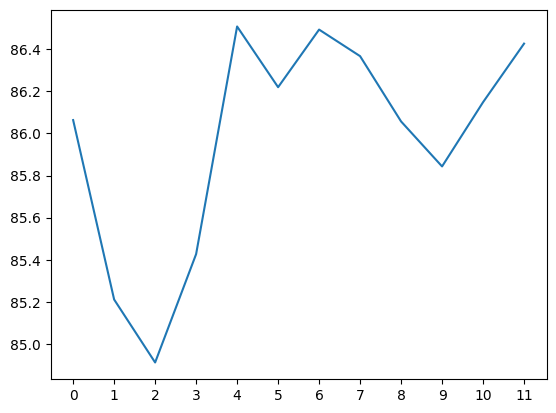

Dataset: en_98 - Features: nfix


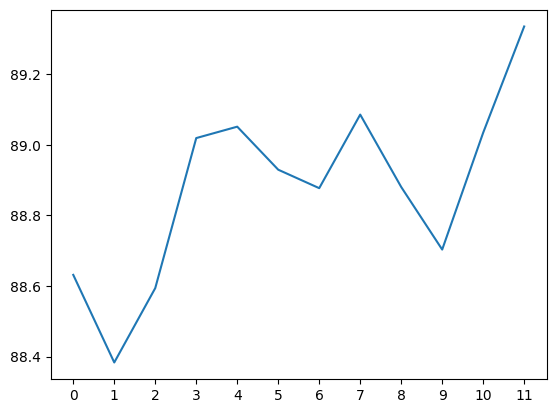

Dataset: en_98 - Features: refix


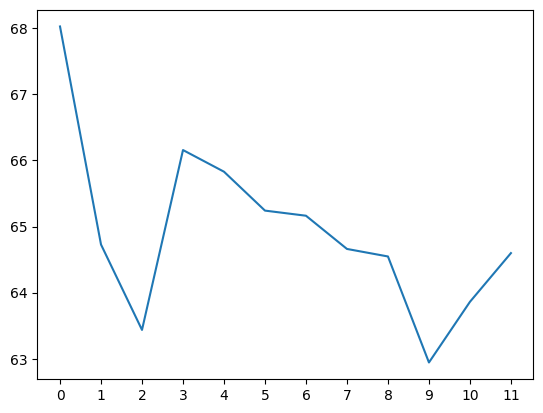

Dataset: en_98 - Features: reread


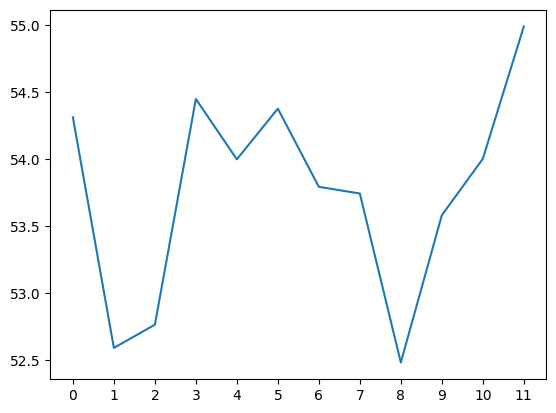

Dataset: en_98 - mean over features


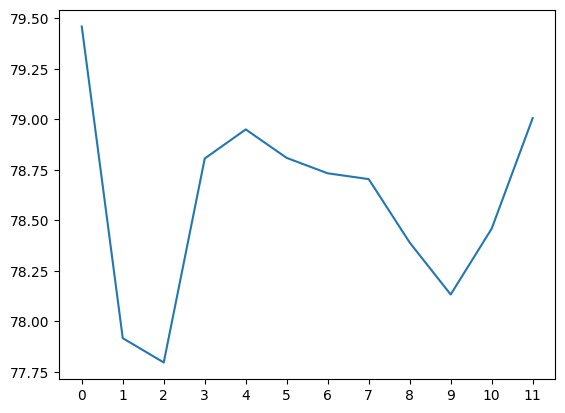

Dataset: en_6 - Features: skip


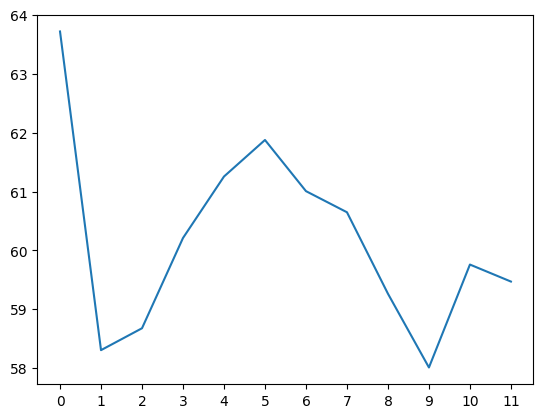

Dataset: en_6 - Features: firstfix_dur


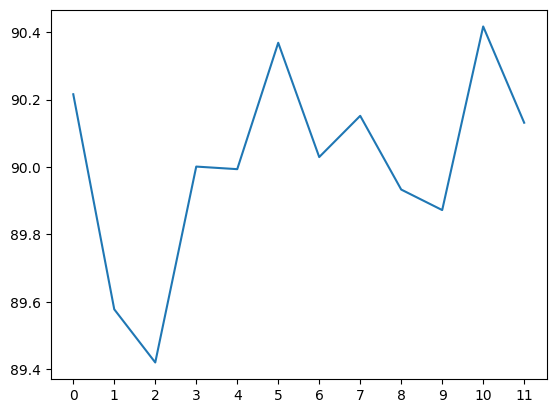

Dataset: en_6 - Features: firstrun_dur


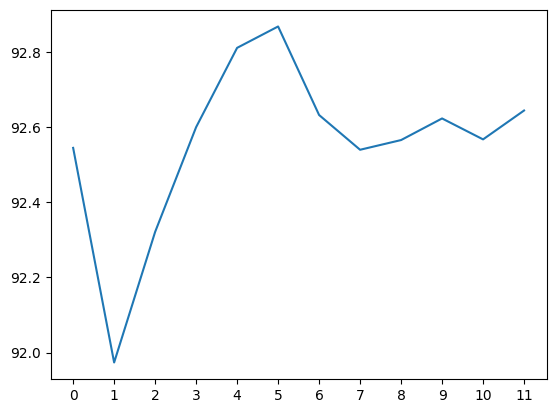

Dataset: en_6 - Features: dur


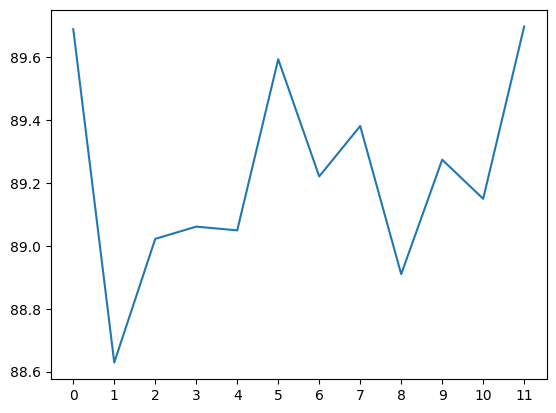

Dataset: en_6 - Features: firstrun_nfix


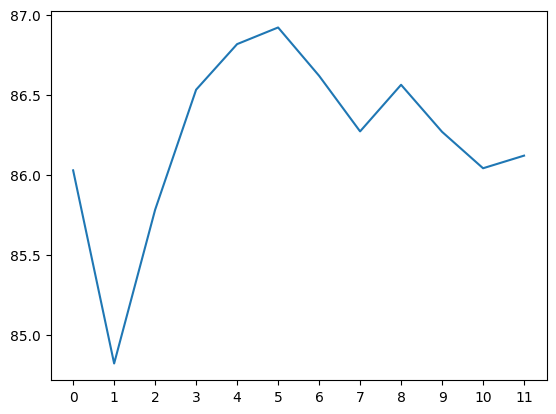

Dataset: en_6 - Features: nfix


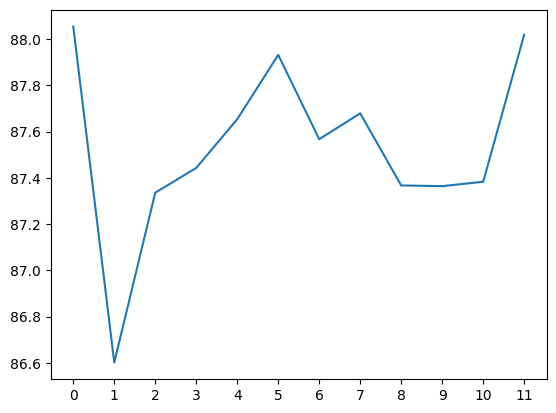

Dataset: en_6 - Features: refix


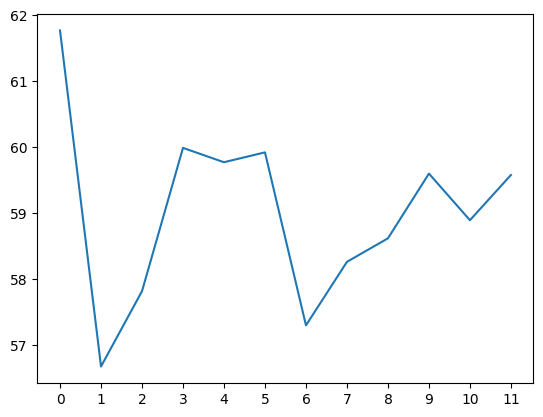

Dataset: en_6 - Features: reread


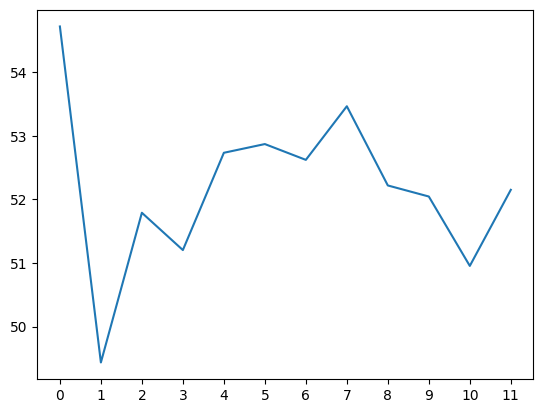

Dataset: en_6 - mean over features


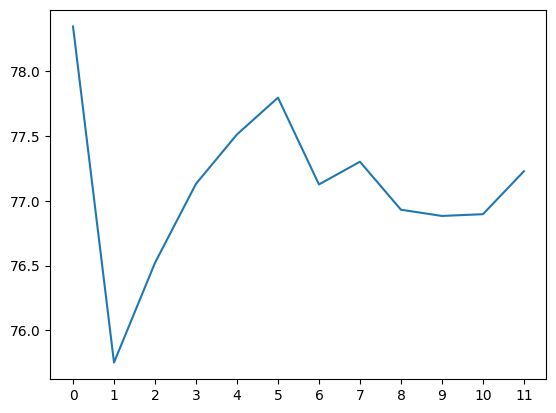

Dataset: en_83 - Features: skip


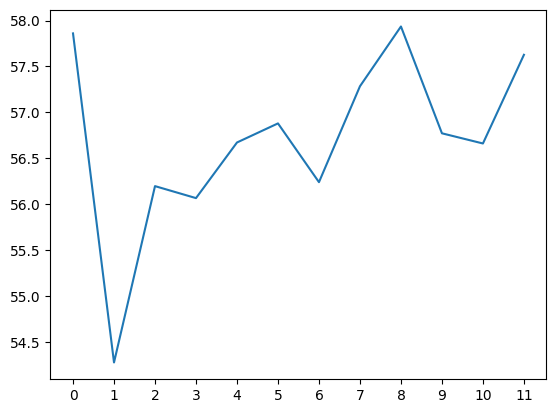

Dataset: en_83 - Features: firstfix_dur


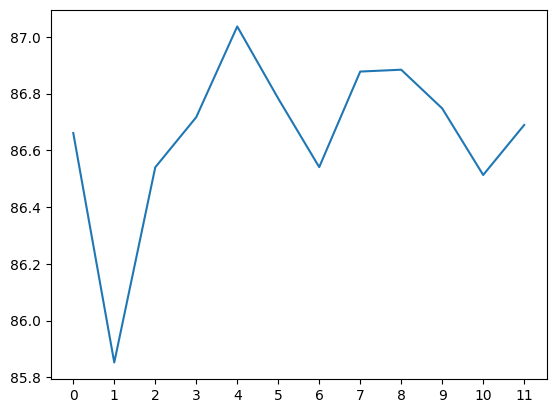

Dataset: en_83 - Features: firstrun_dur


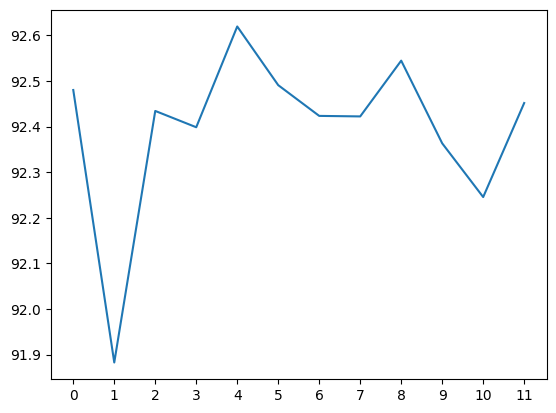

Dataset: en_83 - Features: dur


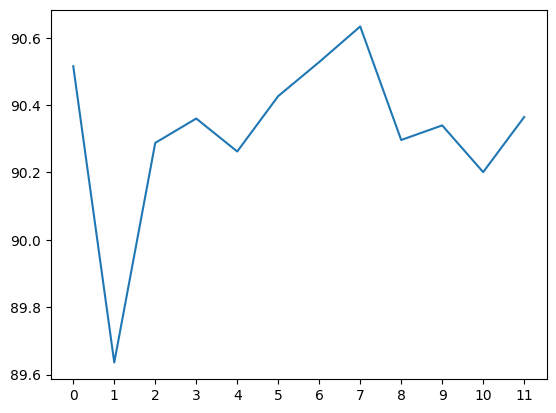

Dataset: en_83 - Features: firstrun_nfix


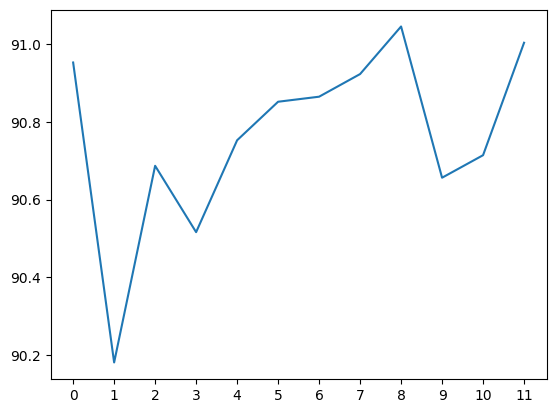

Dataset: en_83 - Features: nfix


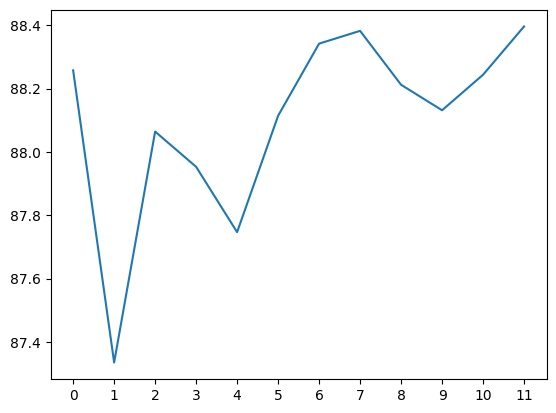

Dataset: en_83 - Features: refix


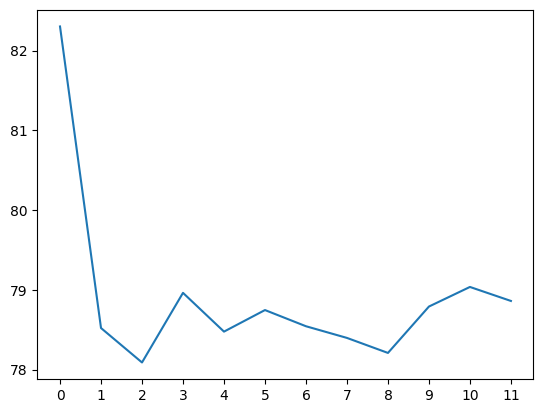

Dataset: en_83 - Features: reread


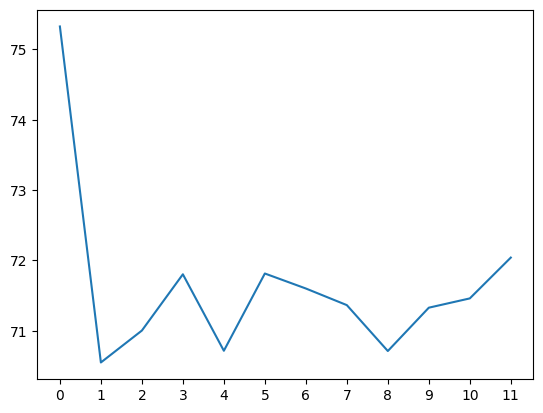

Dataset: en_83 - mean over features


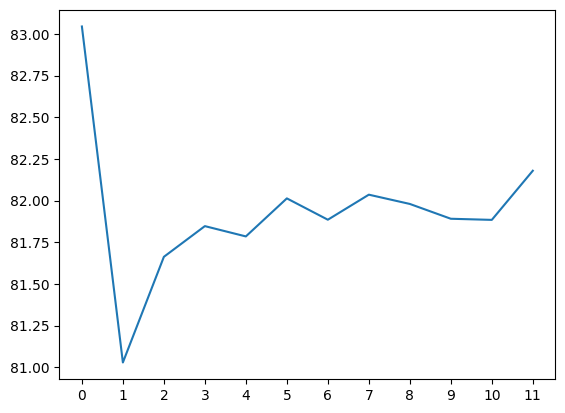

Dataset: en_57 - Features: skip


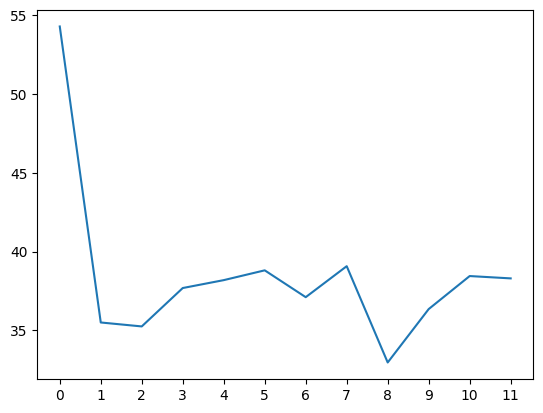

Dataset: en_57 - Features: firstfix_dur


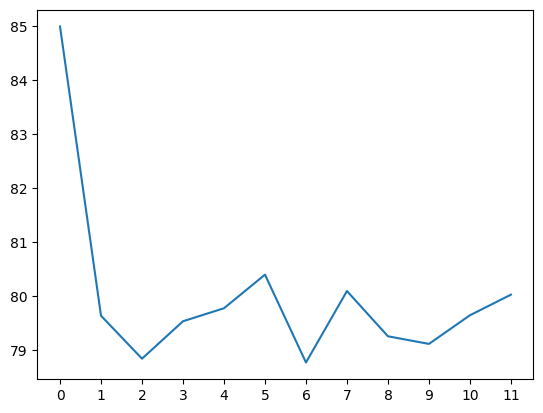

Dataset: en_57 - Features: firstrun_dur


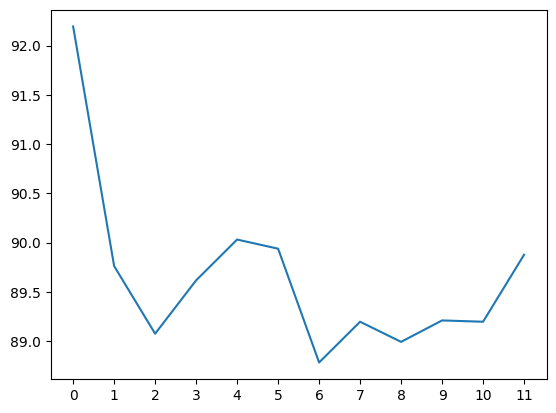

Dataset: en_57 - Features: dur


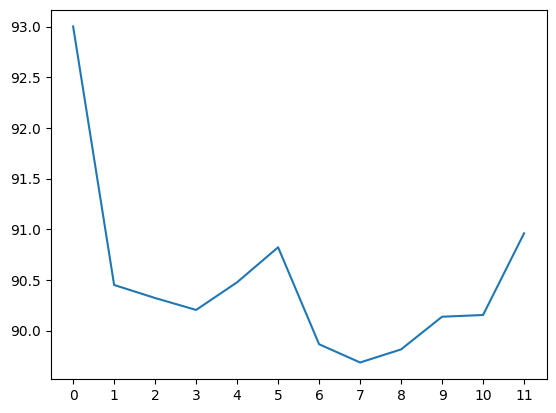

Dataset: en_57 - Features: firstrun_nfix


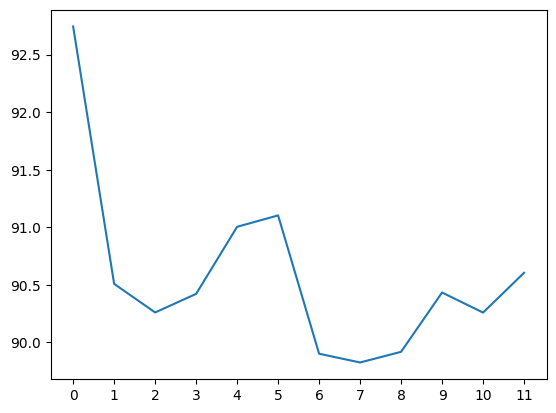

Dataset: en_57 - Features: nfix


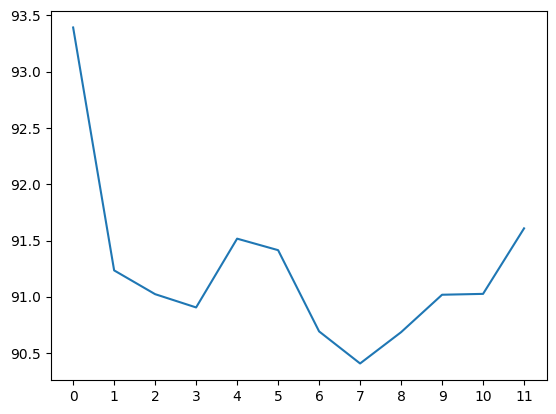

Dataset: en_57 - Features: refix


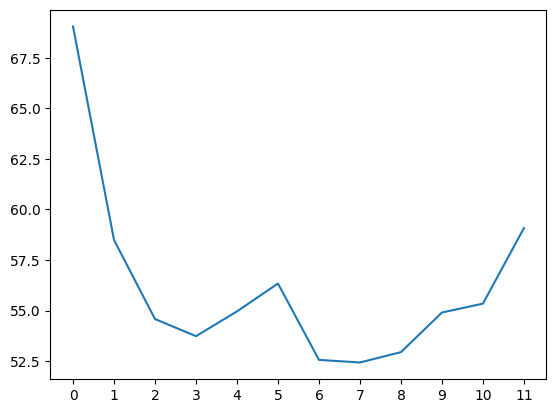

Dataset: en_57 - Features: reread


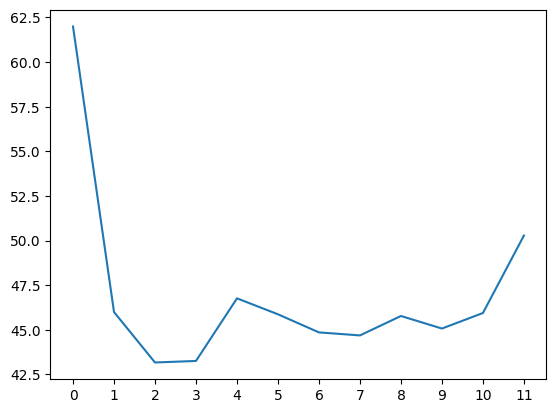

Dataset: en_57 - mean over features


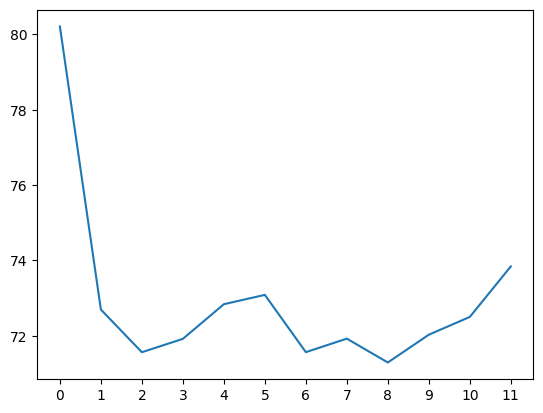

Dataset: it_1 - Features: skip


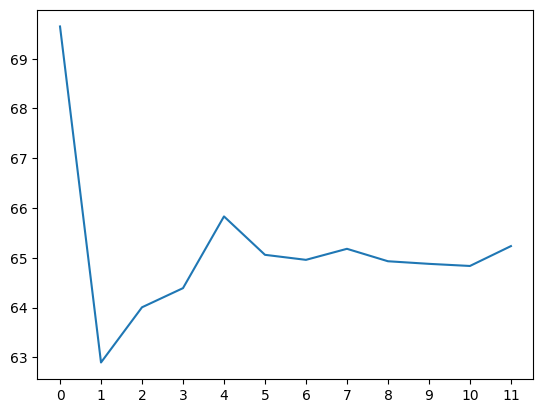

Dataset: it_1 - Features: firstfix_dur


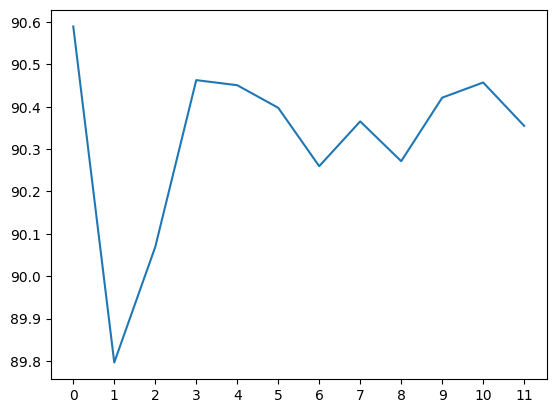

Dataset: it_1 - Features: firstrun_dur


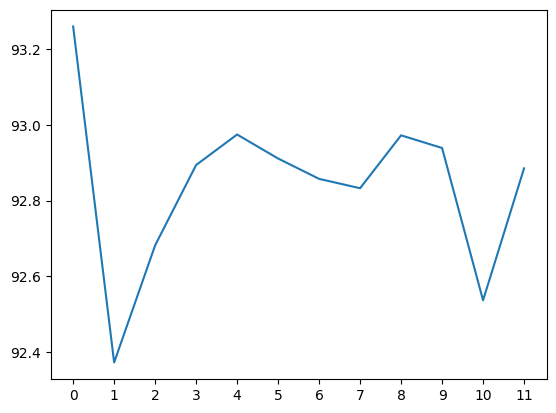

Dataset: it_1 - Features: dur


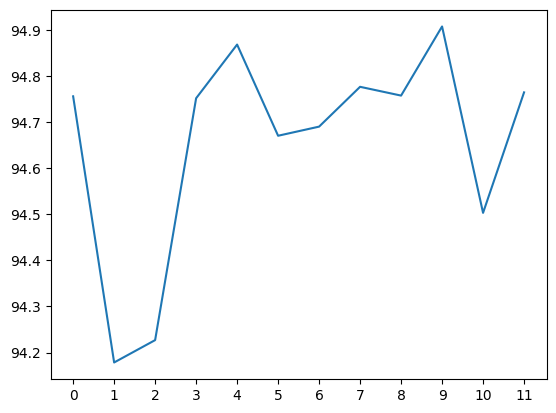

Dataset: it_1 - Features: firstrun_nfix


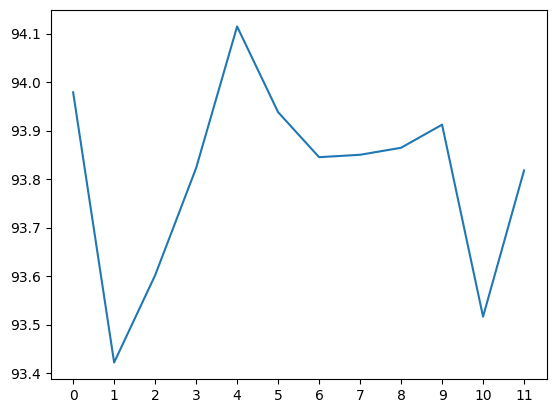

Dataset: it_1 - Features: nfix


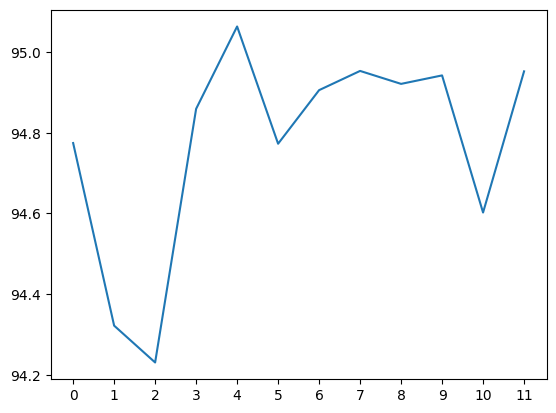

Dataset: it_1 - Features: refix


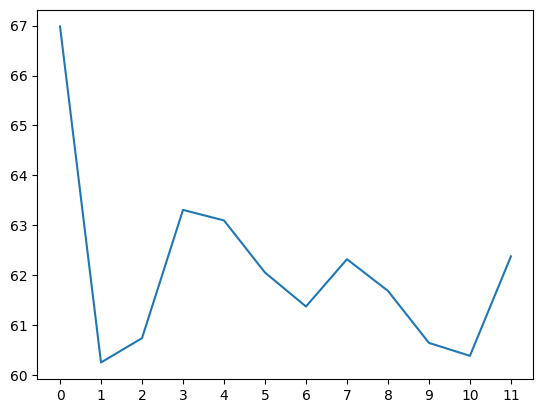

Dataset: it_1 - Features: reread


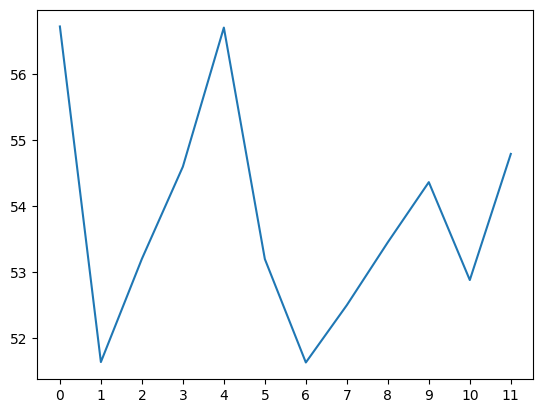

Dataset: it_1 - mean over features


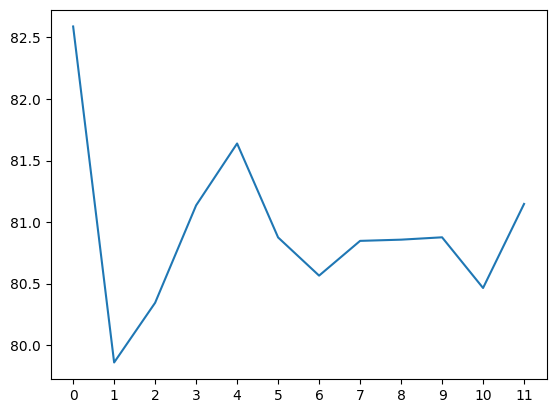

Dataset: it_38 - Features: skip


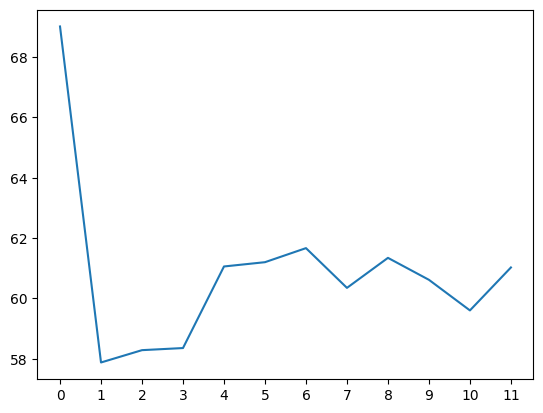

Dataset: it_38 - Features: firstfix_dur


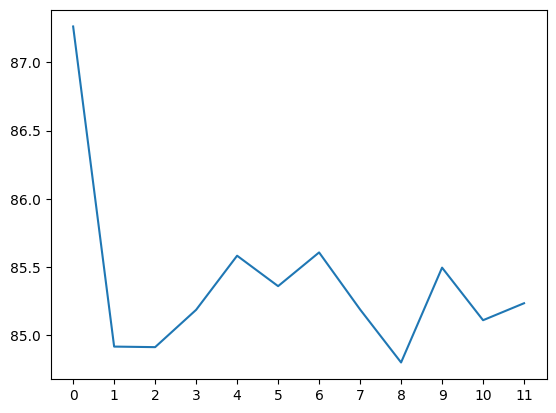

Dataset: it_38 - Features: firstrun_dur


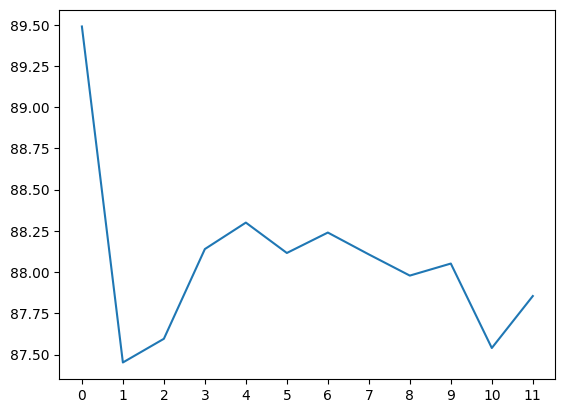

Dataset: it_38 - Features: dur


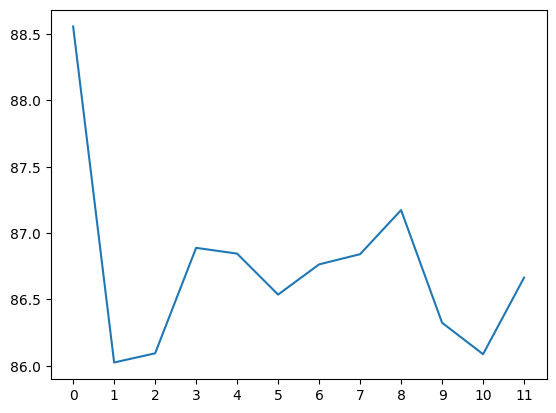

Dataset: it_38 - Features: firstrun_nfix


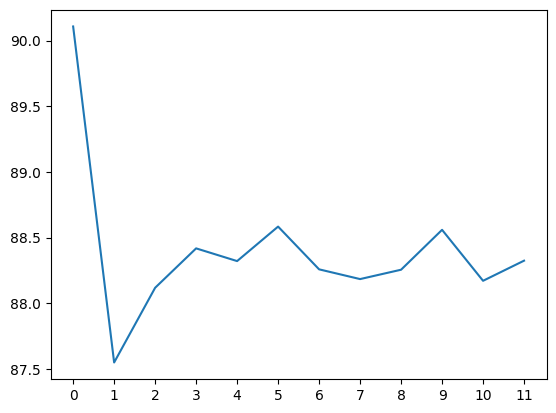

Dataset: it_38 - Features: nfix


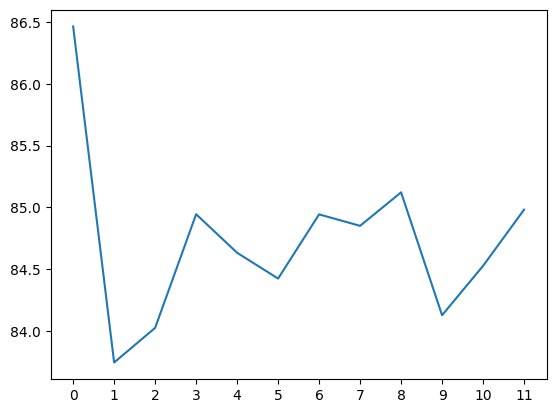

Dataset: it_38 - Features: refix


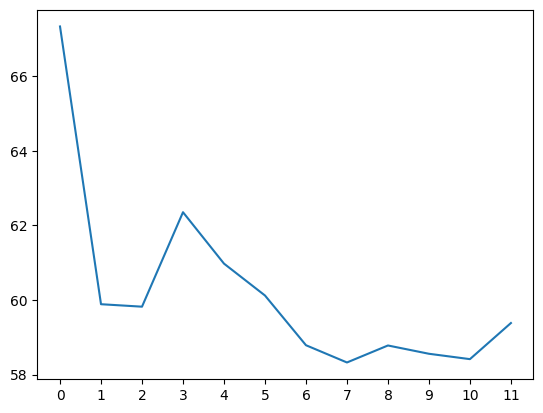

Dataset: it_38 - Features: reread


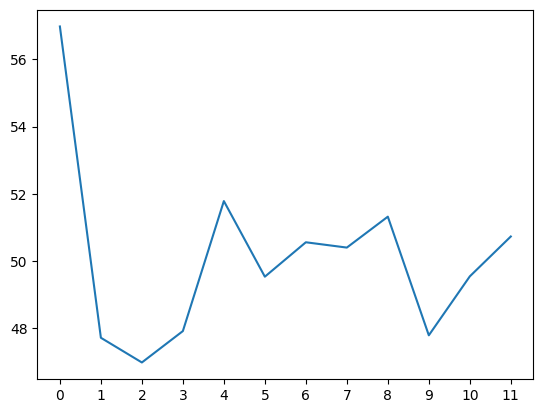

Dataset: it_38 - mean over features


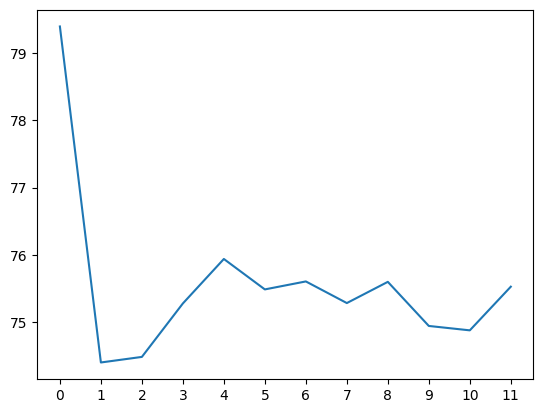

In [6]:
print_probe_results(dict_res_xlm)